In [ ]:
pip install pandas scikit-learn matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


In [3]:
df = pd.read_csv("/content/heart.csv")  # Replace 'heart.csv' with your actual file name
print(df)
# uploaded = files.upload()
# df = pd.read_csv("heart.csv")  # Replace 'heart.csv' with your actual file name
# print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

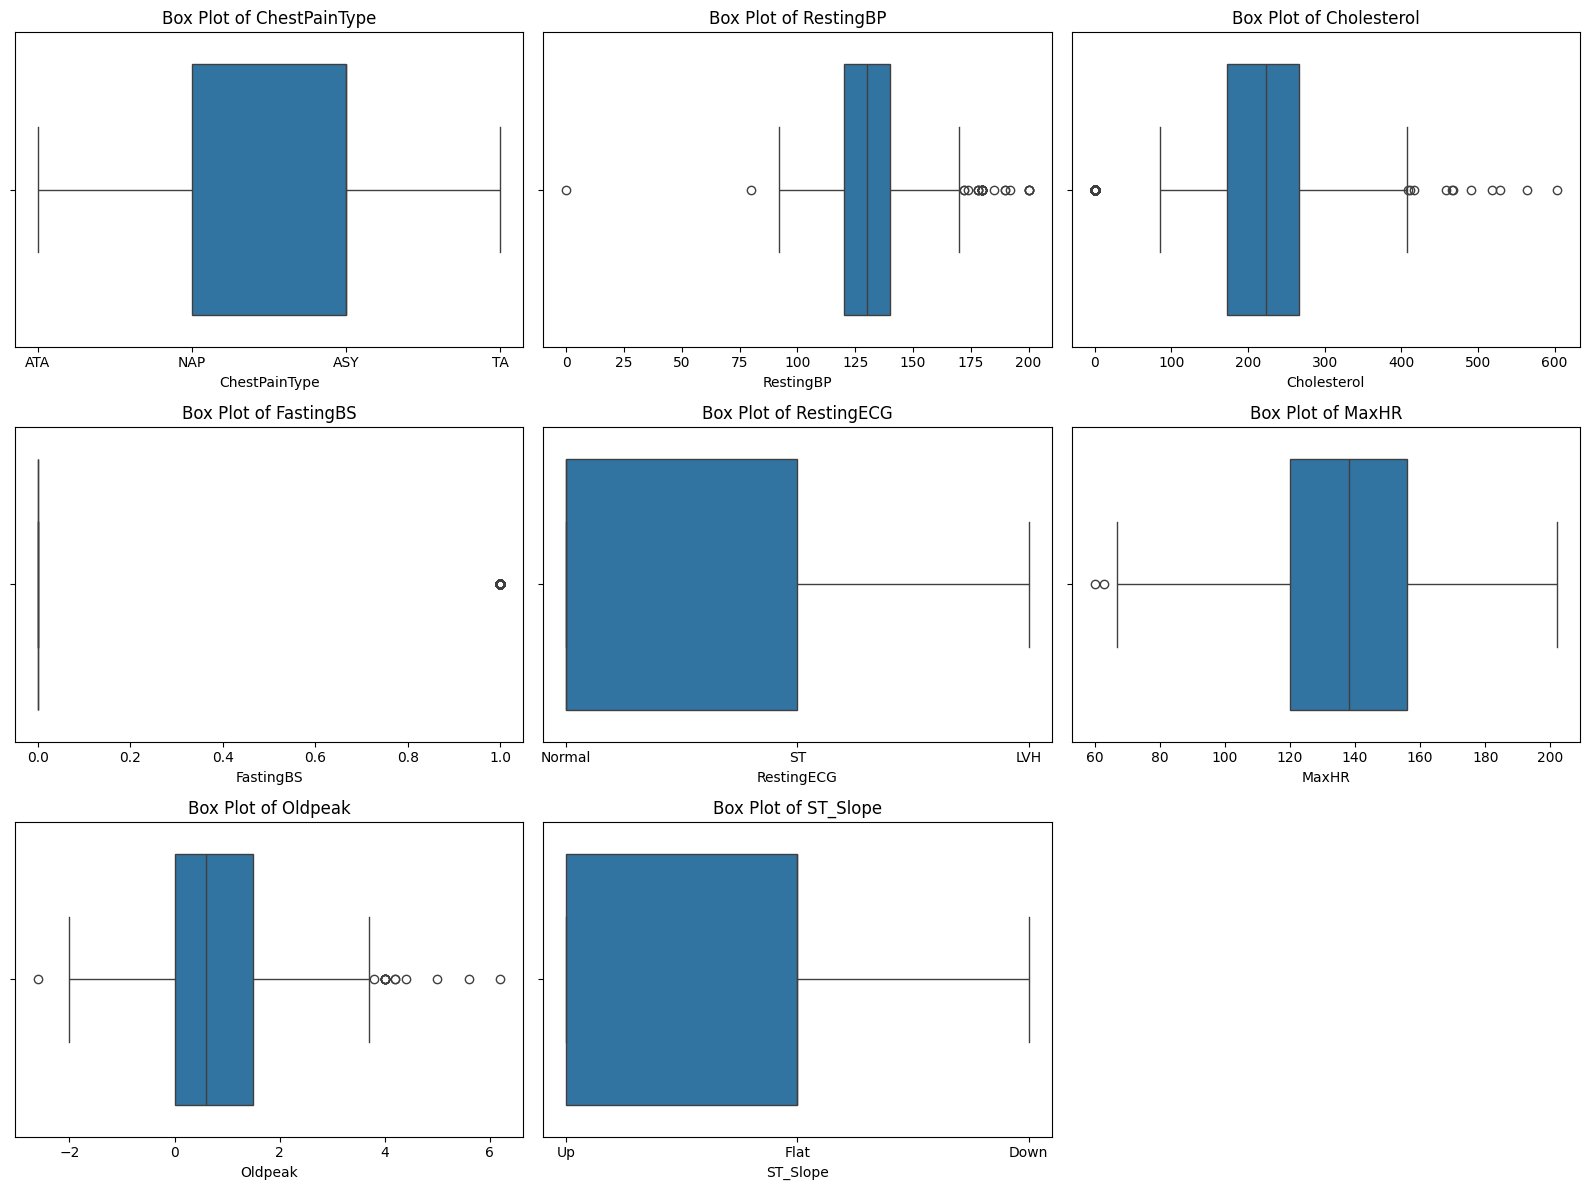

Outliers in RestingBP:
     RestingBP
109        190
123        180
189        180
190        180
241        200
274        180
275        180
278        180
314         80
365        200
372        185
399        200
411        180
423        180
449          0
475        178
550        172
585        180
592        190
673        174
702        178
725        180
732        200
759        192
774        178
780        180
855        180
880        172


Outliers in Cholesterol:
     Cholesterol
28           468
30           518
69           412
76           529
103          466
..           ...
535            0
536            0
616          564
667          417
796          409

[183 rows x 1 columns]


Outliers in FastingBS:
     FastingBS
36           1
38           1
52           1
84           1
86           1
..         ...
887          1
888          1
901          1
911          1
914          1

[214 rows x 1 columns]


Outliers in MaxHR:
     MaxHR
370     63
390     60


Ou

<ipython-input-4-65cb38448fc1>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Sex.replace({'F': 0, 'M': 1}, inplace=True)
<ipython-input-4-65cb38448fc1>:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Sex.replace({'F': 0, 'M': 1}, inplace=True)
<ipython-input-4-65cb38448fc1>:49: FutureWar

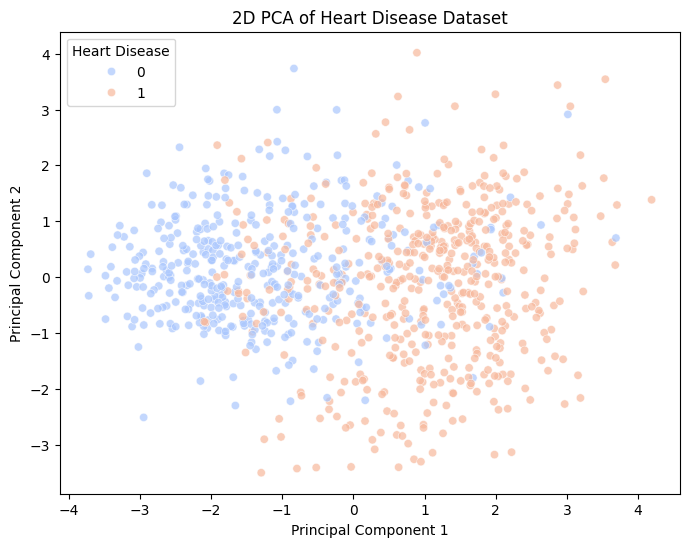

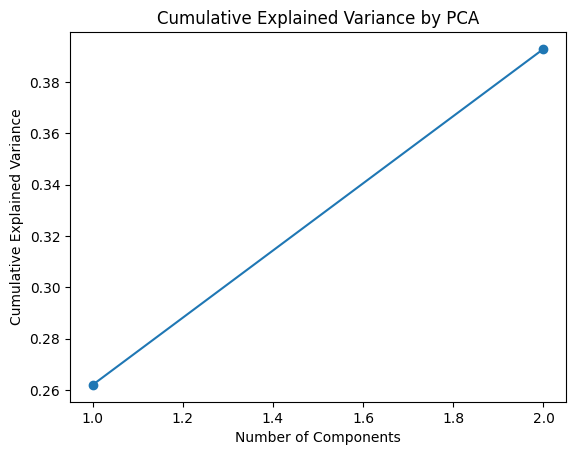

In [4]:
columns = ['ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
           'RestingECG', 'MaxHR', 'Oldpeak', 'ST_Slope']

# Create box plots for each column
plt.figure(figsize=(16, 12))
num_cols = len(columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Adjust number of rows based on columns
for i, col in enumerate(columns, 1):
    plt.subplot(rows, 3, i)  # Arrange in a grid of dynamic rows and 3 columns
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show()

# Function to identify outliers based on IQR
def identify_outliers(df, columns):
    outliers = {}
    for col in columns:
        if df[col].dtype in ['float64', 'int64']:  # Ensure the column is numeric
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Identify outliers for each feature
outliers = identify_outliers(df, columns)

# Print the outliers for each column
for col, outlier_data in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_data[[col]])  # Print only the outlier values for the column
    print("\n")

# Check for null values
print(df.isnull().sum())

# Print data types of columns
print(df.dtypes)

# Dataset information and summary statistics
df.info()
print(df.describe())

# Encode categorical features to numeric
df.Sex.replace({'F': 0, 'M': 1}, inplace=True)
df.ChestPainType.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}, inplace=True)
df.RestingECG.replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
df.ExerciseAngina.replace({'N': 0, 'Y': 1}, inplace=True)
df.ST_Slope.replace({'Up': 0, 'Flat': 1, 'Down': 2}, inplace=True)

# Display the first 10 rows of the dataset
print(df.head(10))

# Separate the target variable from the features
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 2 components for dimensionality reduction
pca = PCA(n_components=2)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Display explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Convert PCA result to DataFrame
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['HeartDisease'] = y  # Add target variable for visualization

# Plot the 2D PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df, palette='coolwarm', alpha=0.7)
plt.title('2D PCA of Heart Disease Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease', loc='best')
plt.show()

# Plot cumulative explained variance
explained_variance_cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_cumsum) + 1), explained_variance_cumsum, marker='o')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


Subset of data for people aged 60 and 51 after replacing outliers:
     Age  MaxHR
18    60    125
29    51    145
55    51    170
101   51    100
181   51    150
..   ...    ...
860   60    144
863   60    155
864   60    142
868   51    123
876   60    132

[67 rows x 2 columns]


<ipython-input-6-ee0fe2833f9b>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='MaxHR', data=df_subset, palette='coolwarm')


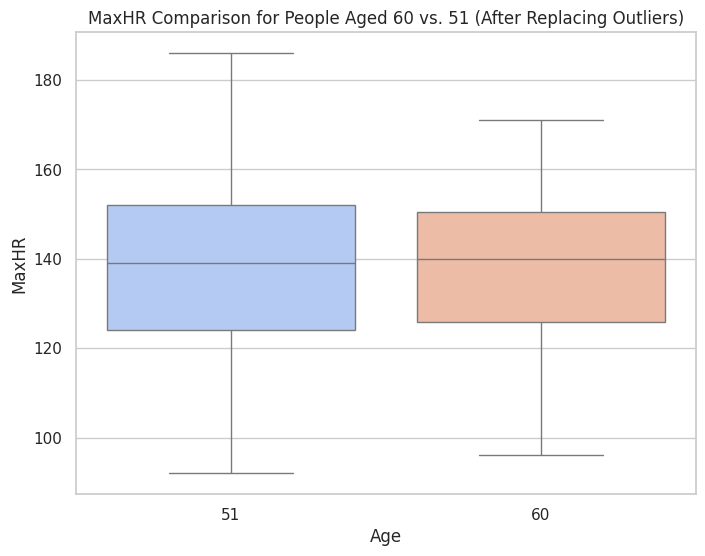

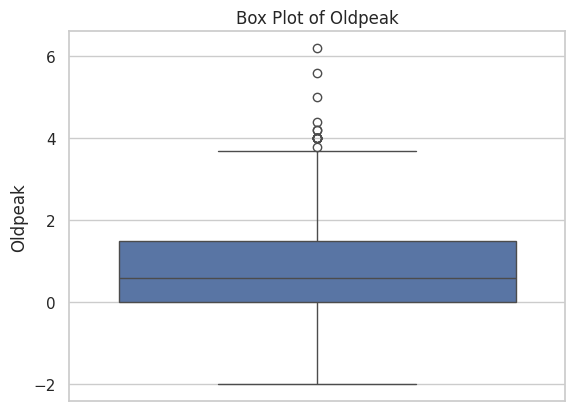

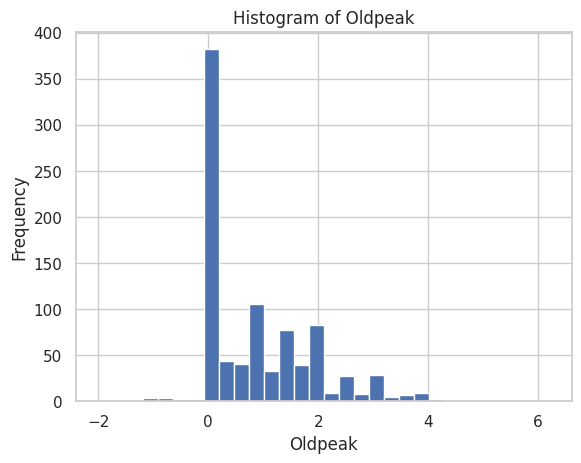

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
320   59    1              1        125          223          1           0   
321   63    1              2        100          223          1           0   
322   38    0              2        105          223          1           0   
323   62    1              2        115          223          1           0   
325   42    1              2        105          223          1           0   
326   45    1              1        110          223          0           0   
327   59    1              2        125          223          1           0   
328   52    1              2         95          223          1           0   
329   60    1              2        130          223          1           1   
330   60    1              1        115       

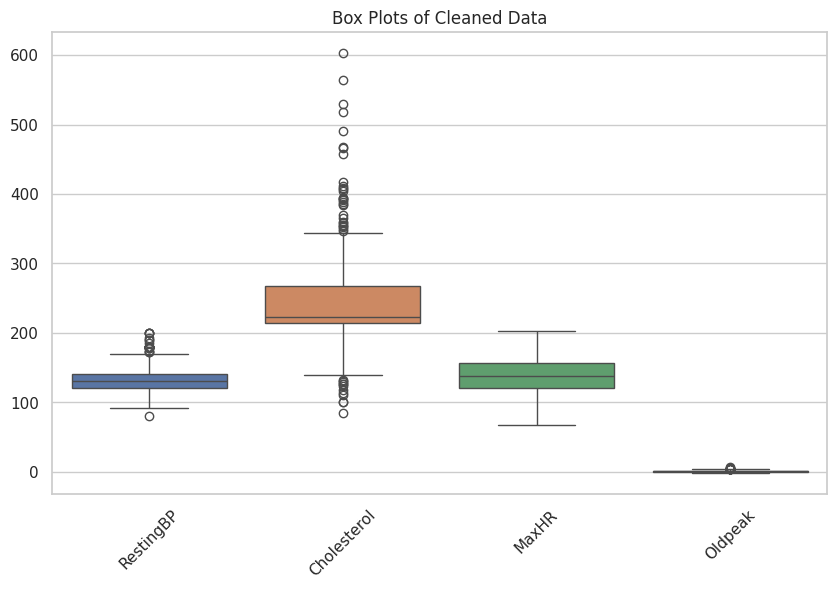

In [6]:
# Filter people aged 60 and 51
age_60 = df[df['Age'] == 60]  # Extract people aged 60
age_51 = df[df['Age'] == 51]  # Extract people aged 51

# Calculate the median MaxHR for each age group
median_maxhr_60 = age_60['MaxHR'].median()
median_maxhr_51 = age_51['MaxHR'].median()


# Define a function to replace outliers in MaxHR with the calculated median
def replace_outliers_with_median_for_age_group(df, age_group, median_maxhr):
    # Filter the data for the specific age group
    age_group_data = df[df['Age'] == age_group]

    # Calculate the IQR for MaxHR within this age group
    Q1 = age_group_data['MaxHR'].quantile(0.25)
    Q3 = age_group_data['MaxHR'].quantile(0.75)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers within the age group
    outliers = age_group_data[(age_group_data['MaxHR'] < lower_bound) | (age_group_data['MaxHR'] > upper_bound)]

    # Replace the outliers with the median MaxHR of that age group
    df.loc[outliers.index, 'MaxHR'] = median_maxhr

    return df

# Replace outliers for age 60 with the median for age 60
df = replace_outliers_with_median_for_age_group(df, 60, median_maxhr_60)

# Replace outliers for age 51 with the median for age 51
df = replace_outliers_with_median_for_age_group(df, 51, median_maxhr_51)

# Verify changes by checking a subset of the data
df_subset = df[df['Age'].isin([60, 51])]  # Check people aged 60 and 51
print("\nSubset of data for people aged 60 and 51 after replacing outliers:")
print(df_subset[['Age', 'MaxHR']])


# Create a boxplot to visualize MaxHR for the two age groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', y='MaxHR', data=df_subset, palette='coolwarm')
plt.title('MaxHR Comparison for People Aged 60 vs. 51 (After Replacing Outliers)')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()



#------------------------------------------------------------------------------------------------
# Boxplot to visualize distribution of Oldpeak values
sns.boxplot(data=df['Oldpeak'])
plt.title('Box Plot of Oldpeak')
plt.show()

# Histogram to see distribution
plt.hist(df['Oldpeak'], bins=30)
plt.title('Histogram of Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Frequency')
plt.show()


df = df[df['Oldpeak'] != -2.6]

# Check if the outlier is removed
print(df[df['Oldpeak'] == -2.6])

df_subset = df.iloc[320:330]
print(df_subset)

# #-------------------------------------------------------------------------------------------------

# Calculate the median of the Cholesterol column
median_cholesterol = df['Cholesterol'].median()

# Replace 0 values in the Cholesterol column with the calculated median
df['Cholesterol'] = df['Cholesterol'].replace(0, median_cholesterol)

# Verify that 0 values have been replaced
print(df[df['Cholesterol'] == 0])  # This should return an empty DataFrame

df_subset = df.iloc[394:409]  # Remember, the ending index in iloc is exclusive, so use 394
print(df_subset)

# #----------------------------------------------------------------------------------------------------

# Remove rows where RestingBP is 0
df = df[df['RestingBP'] != 0]

# Verify that no rows with RestingBP = 0 are left
print(df[df['RestingBP'] == 0])  # This should return an empty DataFrame

# #------------------------------------------------------------------------------------------------------

# Set the style of the plots
sns.set(style="whitegrid")

# List of numerical columns for box plots (customize as needed)
numerical_columns = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']  # Replace with your actual column names

# Create a boxplot for each numerical feature in the dataset
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plots of Cleaned Data')
plt.xticks(rotation=45)
plt.show()

# #-----------------------------------------------------------------------------------------------------------




In [7]:
df.to_csv('updated_heart_disease_dataset.csv', index=False)


In [8]:
updated_df = pd.read_csv('updated_heart_disease_dataset.csv')
print(updated_df.head())

# files.download('updated_heart_disease_dataset.csv')

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              0        140          289          0           0   
1   49    0              1        160          180          0           0   
2   37    1              0        130          283          0           1   
3   48    0              2        138          214          0           0   
4   54    1              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0  


<ipython-input-9-346faec57e27>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_updated.Sex.replace({'F': 0, 'M': 1}, inplace=True)
<ipython-input-9-346faec57e27>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

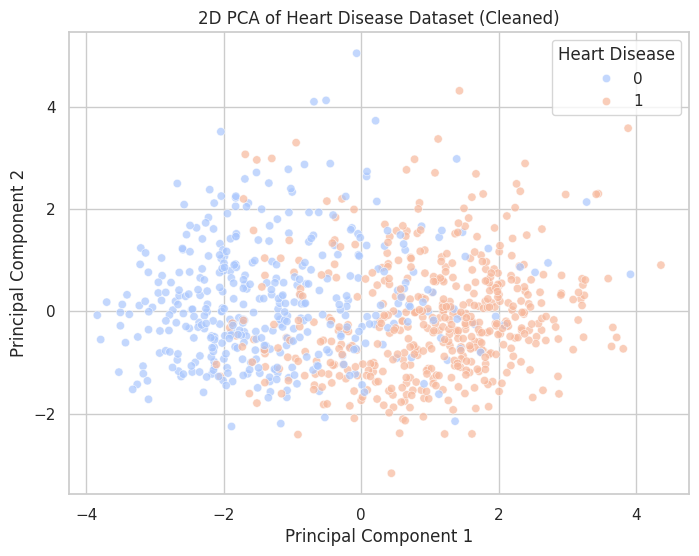

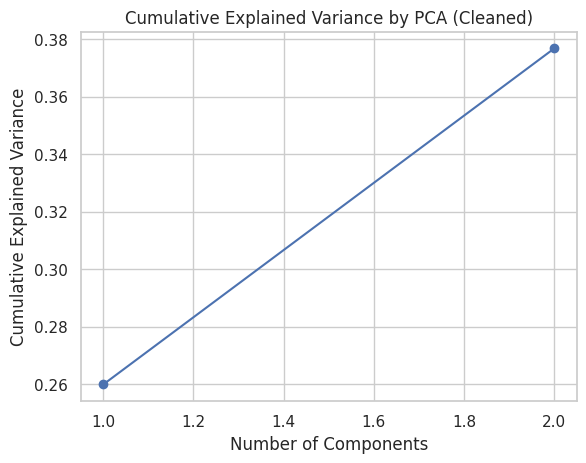

In [9]:
df_updated = pd.read_csv('updated_heart_disease_dataset.csv')


# Encode categorical features to numeric
df_updated.Sex.replace({'F': 0, 'M': 1}, inplace=True)
df_updated.ChestPainType.replace({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3}, inplace=True)
df_updated.RestingECG.replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
df_updated.ExerciseAngina.replace({'N': 0, 'Y': 1}, inplace=True)
df_updated.ST_Slope.replace({'Up': 0, 'Flat': 1, 'Down': 2}, inplace=True)

# Separate the target variable from the features
X_cleaned = df_updated.drop(columns=['HeartDisease'])
y_cleaned = df_updated['HeartDisease']

# Standardize the feature data
X_scaled_cleaned = scaler.fit_transform(X_cleaned)

# Perform PCA with 2 components for dimensionality reduction
X_pca_cleaned = pca.fit_transform(X_scaled_cleaned)

# Convert PCA result to DataFrame
pca_df_cleaned = pd.DataFrame(X_pca_cleaned, columns=['PC1', 'PC2'])
pca_df_cleaned['HeartDisease'] = y_cleaned  # Add target variable for visualization

# Plot the 2D PCA for the cleaned dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df_cleaned, palette='coolwarm', alpha=0.7)
plt.title('2D PCA of Heart Disease Dataset (Cleaned)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease', loc='best')
plt.show()

# Plot cumulative explained variance for the cleaned dataset
explained_variance_cumsum_cleaned = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_cumsum_cleaned) + 1), explained_variance_cumsum_cleaned, marker='o')
plt.title('Cumulative Explained Variance by PCA (Cleaned)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


Training set size: 732
Testing set size: 92
Validation set size: 92
    kernel  precision    recall  f1_score
0   linear   0.862745  0.862745  0.862745
1     poly   0.840000  0.823529  0.831683
2      rbf   0.882353  0.882353  0.882353
3  sigmoid   0.854167  0.803922  0.828283


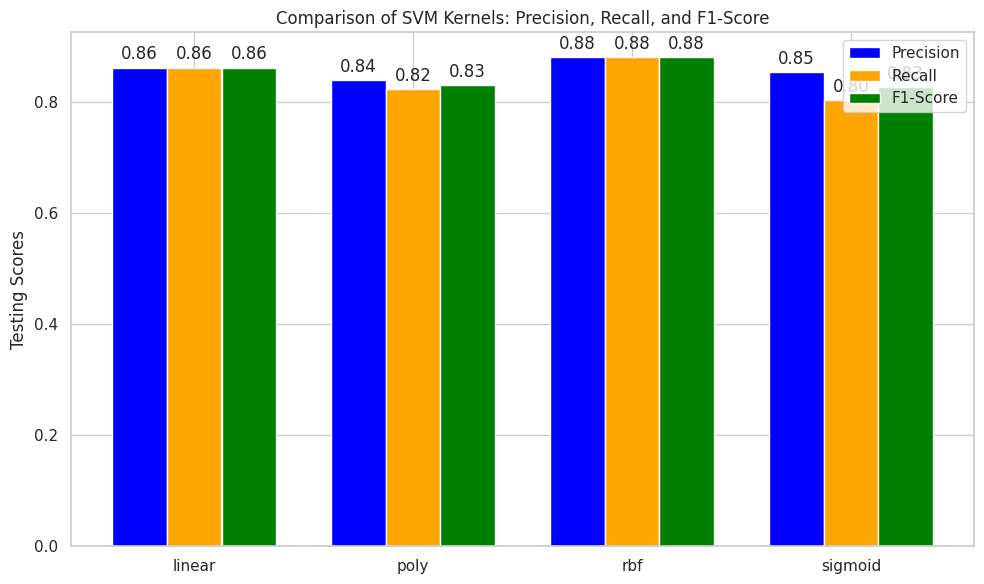

    kernel  precision    recall  f1_score
0   linear   0.849057  0.882353  0.865385
1     poly   0.842105  0.941176  0.888889
2      rbf   0.813559  0.941176  0.872727
3  sigmoid   0.857143  0.823529  0.840000


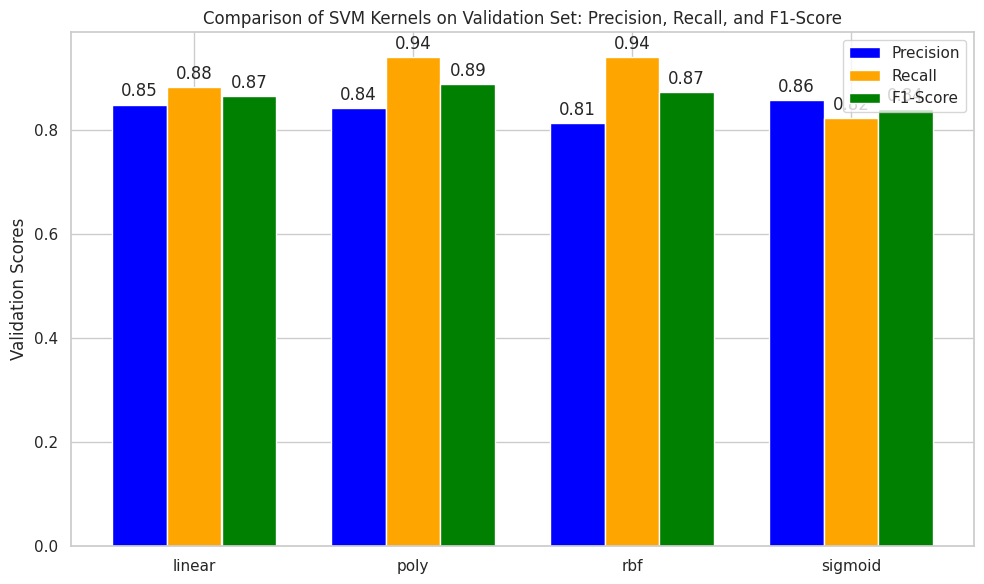

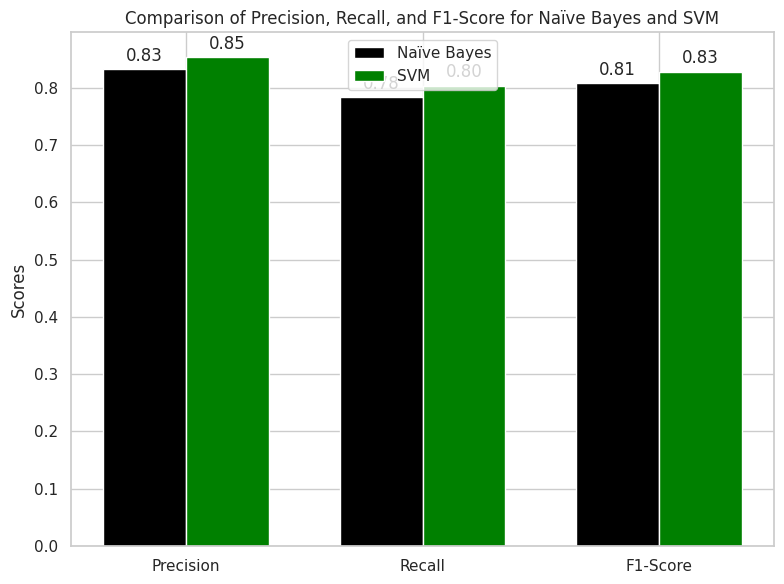

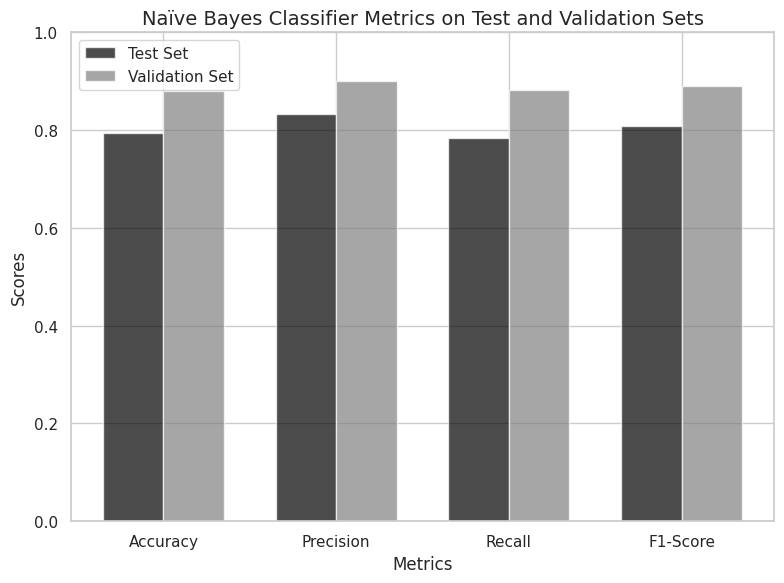

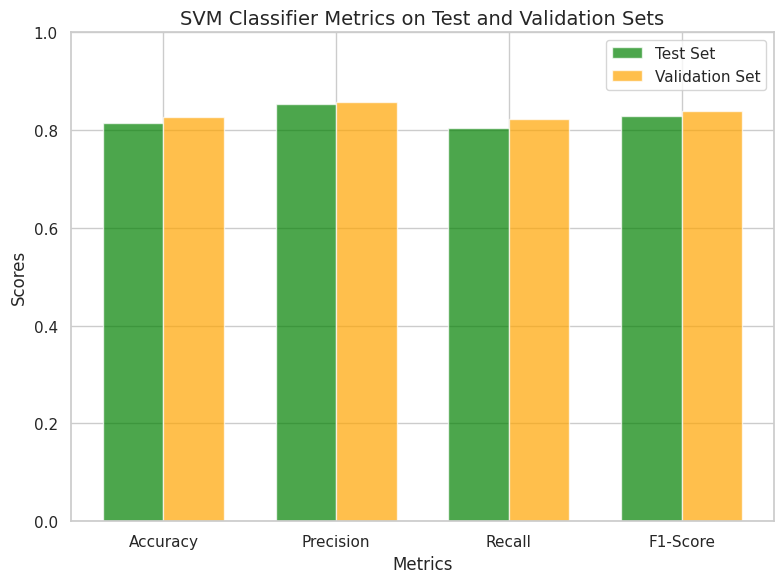

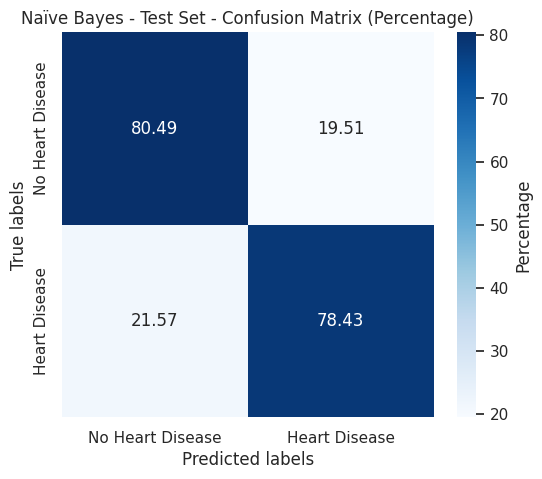

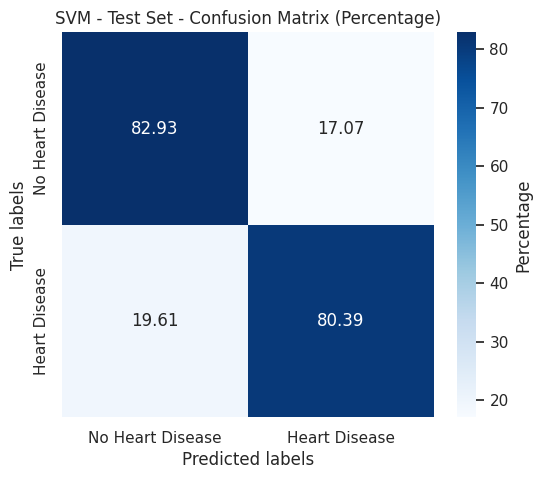

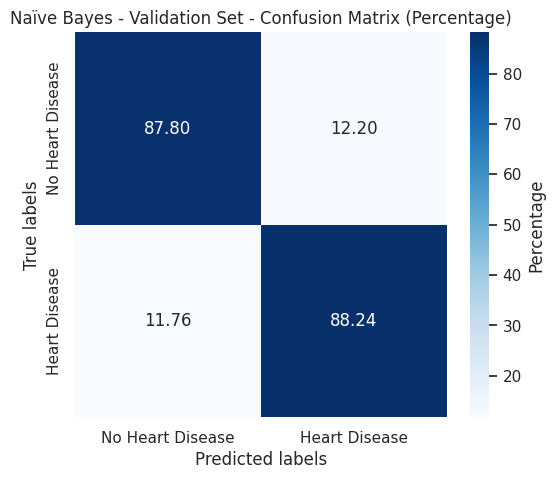

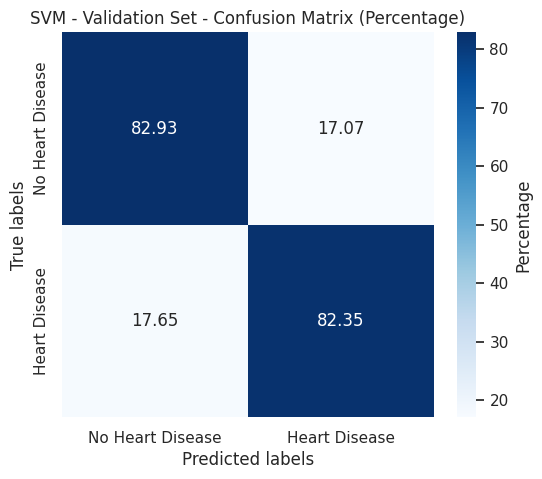

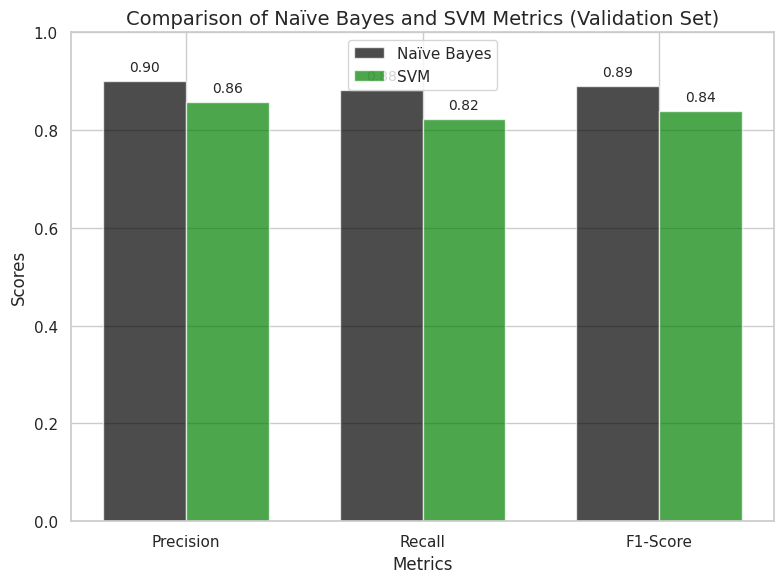

In [10]:

#-------------------------------------------------------------SVM and Naiive Bayes Classifiers--------------------------------------------------------
# 1. Separate features (X) and target (y)
X_features = df_updated.drop(columns=['HeartDisease'])
y_target = df_updated['HeartDisease']

# 2. Split data into 80% training and 20% remaining
X_train, X_temp, y_train, y_temp = train_test_split(
    X_features, y_target, test_size=0.2, random_state=42, stratify=y_target
)

# 3. Split remaining data into 10% testing and 10% validation
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# 4. Standardize the features
scaler = StandardScaler()

# Standardize training data and Standardize testing and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Verify splits
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Validation set size: {len(X_val)}")

#-------------------------------------------------------------------------------
# 5. Train and Evaluate Naïve Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_nb = nb_classifier.predict(X_test_scaled)

# Calculate metrics for Naïve Bayes
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)
#-------------------------------------------------------------------------------


# 1. Define a list of SVM kernels to evaluate
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
#TESTING SET
# 2. Create empty lists to store the results for each kernel
svm_kernel_results = {
    'kernel': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

# 3. Loop through each kernel and train/evaluate SVM
for kernel in kernels:
    # Initialize the SVM classifier with the current kernel
    svm_classifier = SVC(kernel=kernel, random_state=42)

    # Train the SVM classifier
    svm_classifier.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred_svm = svm_classifier.predict(X_test_scaled)

    # Calculate the metrics for the current kernel
    precision = precision_score(y_test, y_pred_svm)
    recall = recall_score(y_test, y_pred_svm)
    f1 = f1_score(y_test, y_pred_svm)

    # Append the results
    svm_kernel_results['kernel'].append(kernel)
    svm_kernel_results['precision'].append(precision)
    svm_kernel_results['recall'].append(recall)
    svm_kernel_results['f1_score'].append(f1)

# Convert results into a DataFrame for easier comparison
import pandas as pd
svm_kernel_comparison = pd.DataFrame(svm_kernel_results)

# Display the results
print(svm_kernel_comparison)

# 4. Plotting the results
# Prepare the metrics for plotting
metrics = ['Precision', 'Recall', 'F1-Score']
kernel_scores = [list(svm_kernel_comparison['precision']),
                 list(svm_kernel_comparison['recall']),
                 list(svm_kernel_comparison['f1_score'])]

# Set bar width and position for the bars
bar_width = 0.25
x = np.arange(len(kernels))  # The label locations

# Plotting the comparison bar graph for SVM kernels
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
rects1 = ax.bar(x - bar_width, kernel_scores[0], bar_width, label='Precision', color='blue')
rects2 = ax.bar(x, kernel_scores[1], bar_width, label='Recall', color='orange')
rects3 = ax.bar(x + bar_width, kernel_scores[2], bar_width, label='F1-Score', color='green')

# Labeling the graph
ax.set_ylabel('Testing Scores')
ax.set_title('Comparison of SVM Kernels: Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(kernels)
ax.legend()

# Function to add labels above the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add value labels on top of each bar
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Show the plot
plt.tight_layout()
plt.show()

#Train and Evaluate SVM using rbf kernel
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train_scaled, y_train)
#-------------------------------------------------------------------------------

# 5. Create empty lists to store validation results for each kernel
svm_kernel_validation_results = {
    'kernel': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

# 6. Loop through each kernel and train/evaluate SVM
for kernel in kernels:
    # Initialize the SVM classifier with the current kernel
    svm_classifier = SVC(kernel=kernel, random_state=42)

    # Train the SVM classifier
    svm_classifier.fit(X_train_scaled, y_train)

    # Predict on the validation set
    y_val_pred_svm = svm_classifier.predict(X_val_scaled)

    # Calculate the metrics for the current kernel on the validation set
    precision = precision_score(y_val, y_val_pred_svm)
    recall = recall_score(y_val, y_val_pred_svm)
    f1 = f1_score(y_val, y_val_pred_svm)

    # Append the results
    svm_kernel_validation_results['kernel'].append(kernel)
    svm_kernel_validation_results['precision'].append(precision)
    svm_kernel_validation_results['recall'].append(recall)
    svm_kernel_validation_results['f1_score'].append(f1)

# Convert validation results into a DataFrame for easier comparison
svm_kernel_validation_comparison = pd.DataFrame(svm_kernel_validation_results)

# Display the validation results
print(svm_kernel_validation_comparison)

# 7. Plotting the validation results
# Prepare the metrics for plotting
validation_kernel_scores = [list(svm_kernel_validation_comparison['precision']),
                            list(svm_kernel_validation_comparison['recall']),
                            list(svm_kernel_validation_comparison['f1_score'])]

# Plotting the comparison bar graph for SVM kernels (Validation Set)
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for each metric
rects1 = ax.bar(x - bar_width, validation_kernel_scores[0], bar_width, label='Precision', color='blue')
rects2 = ax.bar(x, validation_kernel_scores[1], bar_width, label='Recall', color='orange')
rects3 = ax.bar(x + bar_width, validation_kernel_scores[2], bar_width, label='F1-Score', color='green')

# Labeling the graph
ax.set_ylabel('Validation Scores')
ax.set_title('Comparison of SVM Kernels on Validation Set: Precision, Recall, and F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(kernels)
ax.legend()

# Add value labels on top of each bar
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Show the plot
plt.tight_layout()
plt.show()

#-------------------------------------------------------------------------------
# Predict on test data
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Calculate metrics for SVM
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# 7. Prepare Data for Plotting
metrics = ['Precision', 'Recall', 'F1-Score']
nb_scores = [nb_precision, nb_recall, nb_f1]
svm_scores = [svm_precision, svm_recall, svm_f1]

# Set bar width and position for the bars
bar_width = 0.35
x = np.arange(len(metrics))  # The label locations

# Plotting the comparison bar graph
fig, ax = plt.subplots(figsize=(8, 6))

# Create bars for Naïve Bayes and SVM scores
rects1 = ax.bar(x - bar_width / 2, nb_scores, bar_width, label='Naïve Bayes', color='black')
rects2 = ax.bar(x + bar_width / 2, svm_scores, bar_width, label='SVM', color='green')

# Labeling the graph
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, and F1-Score for Naïve Bayes and SVM')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add labels above the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add value labels on top of each bar
add_labels(rects1)
add_labels(rects2)

# Show the plot
plt.tight_layout()
plt.show()

# 8. Plotting for Naïve Bayes on and SVM Test Sets
metrics_all = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
nb_metrics_test = [
    accuracy_score(y_test, y_pred_nb),
    nb_precision,
    nb_recall,
    nb_f1
]

svm_metrics_test = [
    accuracy_score(y_test, y_pred_svm),
    svm_precision,
    svm_recall,
    svm_f1
]

# Predicting for Validation Set for both classifiers
y_val_pred_nb = nb_classifier.predict(X_val_scaled)
y_val_pred_svm = svm_classifier.predict(X_val_scaled)

nb_metrics_val = [
    accuracy_score(y_val, y_val_pred_nb),
    precision_score(y_val, y_val_pred_nb),
    recall_score(y_val, y_val_pred_nb),
    f1_score(y_val, y_val_pred_nb)
]

svm_metrics_val = [
    accuracy_score(y_val, y_val_pred_svm),
    precision_score(y_val, y_val_pred_svm),
    recall_score(y_val, y_val_pred_svm),
    f1_score(y_val, y_val_pred_svm)
]

# Bar width and positions for plotting
bar_width = 0.35
indices = np.arange(len(metrics_all))

# Naïve Bayes Plotting
plt.figure(figsize=(8, 6))

# Create bars for Naïve Bayes metrics for both Test and Validation sets
plt.bar(indices - bar_width / 2, nb_metrics_test, width=bar_width, label='Test Set', color='black', alpha=0.7)
plt.bar(indices + bar_width / 2, nb_metrics_val, width=bar_width, label='Validation Set', color='gray', alpha=0.7)

# Add labels and title for Naïve Bayes
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Naïve Bayes Classifier Metrics on Test and Validation Sets', fontsize=14)
plt.xticks(indices, metrics_all)
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.legend()

# Show the plot for Naïve Bayes
plt.tight_layout()
plt.show()

# SVM Plotting
plt.figure(figsize=(8, 6))

# Create bars for SVM metrics for both Test and Validation sets
plt.bar(indices - bar_width / 2, svm_metrics_test, width=bar_width, label='Test Set', color='green', alpha=0.7)
plt.bar(indices + bar_width / 2, svm_metrics_val, width=bar_width, label='Validation Set', color='orange', alpha=0.7)

# Add labels and title for SVM
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('SVM Classifier Metrics on Test and Validation Sets', fontsize=14)
plt.xticks(indices, metrics_all)
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.legend()

# Show the plot for SVM
plt.tight_layout()
plt.show()
#-------------------------------------------------------------------------------

# Function to plot confusion matrix as percentages
def plot_confusion_matrix(y_true, y_pred, title, cmap="Blues"):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize the matrix by row (true class) to get percentages
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap=cmap, xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'], cbar_kws={'label': 'Percentage'})

    plt.title(f'{title} - Confusion Matrix (Percentage)')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Naïve Bayes Confusion Matrix on Test Set
plot_confusion_matrix(y_test, y_pred_nb, "Naïve Bayes - Test Set")

# SVM Confusion Matrix on Test Set
plot_confusion_matrix(y_test, y_pred_svm, "SVM - Test Set")

# Naïve Bayes Confusion Matrix on Validation Set
y_val_pred_nb = nb_classifier.predict(X_val_scaled)
plot_confusion_matrix(y_val, y_val_pred_nb, "Naïve Bayes - Validation Set")

# SVM Confusion Matrix on Validation Set
y_val_pred_svm = svm_classifier.predict(X_val_scaled)
plot_confusion_matrix(y_val, y_val_pred_svm, "SVM - Validation Set")
#----------------------------------------------------------------------------
# 9. Plotting Comparison of Metrics for Naïve Bayes and SVM (Validation Set)
# Prepare data for plotting
metrics_all = ['Precision', 'Recall', 'F1-Score']  # Exclude Accuracy
nb_validation_scores = nb_metrics_val[1:]  # Exclude Accuracy (index 0)
svm_validation_scores = svm_metrics_val[1:]  # Exclude Accuracy (index 0)

# Bar width and positions for plotting
bar_width = 0.35
indices = np.arange(len(metrics_all))

# Plotting Validation Metrics for Naïve Bayes and SVM
plt.figure(figsize=(8, 6))

# Create bars for Naïve Bayes and SVM metrics on Validation Set
plt.bar(indices - bar_width / 2, nb_validation_scores, width=bar_width, label='Naïve Bayes', color='black', alpha=0.7)
plt.bar(indices + bar_width / 2, svm_validation_scores, width=bar_width, label='SVM', color='green', alpha=0.7)

# Add labels and title
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Naïve Bayes and SVM Metrics (Validation Set)', fontsize=14)
plt.xticks(indices, metrics_all)
plt.ylim(0, 1)  # Metrics range from 0 to 1
plt.legend()

# Add labels above bars
for i, score in enumerate(nb_validation_scores):
    plt.text(i - bar_width / 2, score + 0.02, f'{score:.2f}', ha='center', fontsize=10)

for i, score in enumerate(svm_validation_scores):
    plt.text(i + bar_width / 2, score + 0.02, f'{score:.2f}', ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()



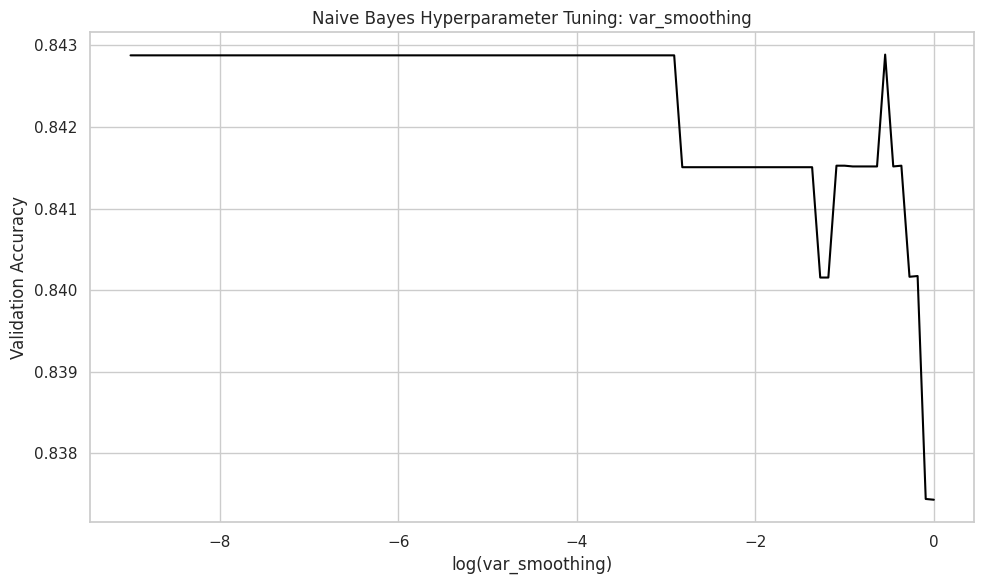

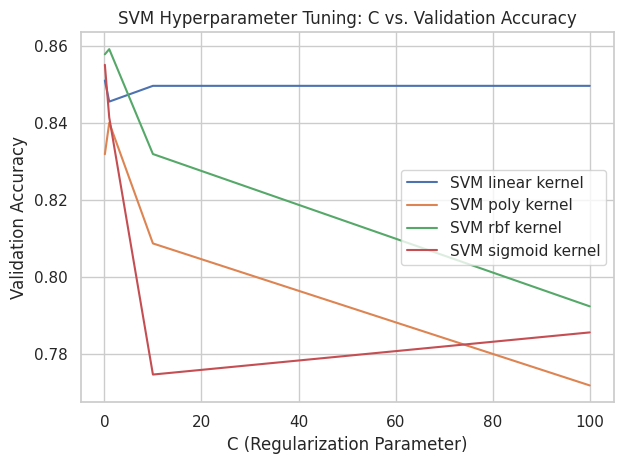

In [11]:
#------------------------------------------Hyperparamters vs Validation accuracies for SVM and Naiive Bayes-------------------------------

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# 1. Hyperparameters for Naive Bayes
nb_param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Range of smoothing parameter
}

# 2. Hyperparameters for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

# 3. Grid Search for Naive Bayes
nb_grid_search = GridSearchCV(GaussianNB(), nb_param_grid, cv=5, scoring='accuracy')
nb_grid_search.fit(X_train_scaled, y_train)

# 4. Grid Search for SVM
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train_scaled, y_train)

# 5. Plotting the Hyperparameter Tuning Results

# Plot for Naive Bayes (var_smoothing vs. validation accuracy)
plt.figure(figsize=(10, 6))
plt.plot(np.log10(nb_grid_search.param_grid['var_smoothing']), nb_grid_search.cv_results_['mean_test_score'], label='Naïve Bayes', color='black')
plt.xlabel('log(var_smoothing)')
plt.ylabel('Validation Accuracy')
plt.title('Naive Bayes Hyperparameter Tuning: var_smoothing')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for SVM (C vs. validation accuracy for each kernel)
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    idx = np.where(np.array(svm_grid_search.cv_results_['param_kernel']) == kernel)[0]
    plt.plot(np.array(svm_grid_search.cv_results_['param_C'])[idx], svm_grid_search.cv_results_['mean_test_score'][idx], label=f"SVM {kernel} kernel")

plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Validation Accuracy')
plt.title('SVM Hyperparameter Tuning: C vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



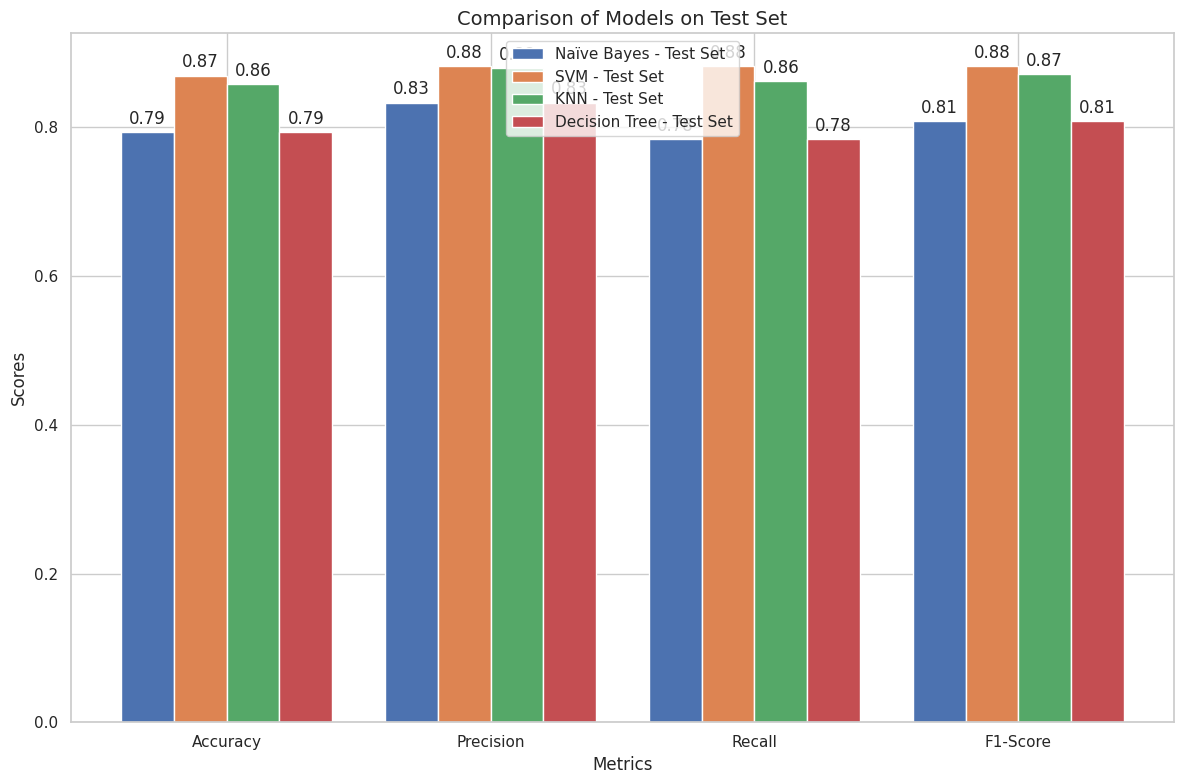

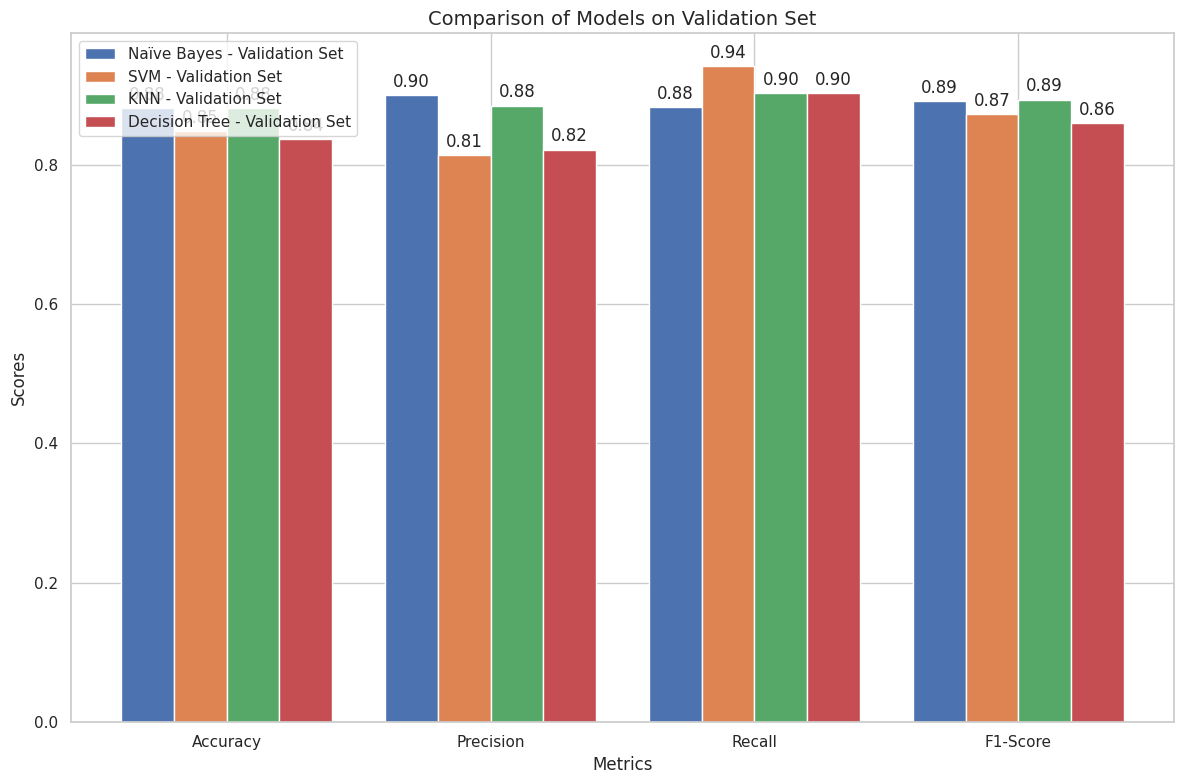

KNN Test Set Confusion Matrix (Percentage):
[[85.36585366 14.63414634]
 [13.7254902  86.2745098 ]]
KNN Validation Set Confusion Matrix (Percentage):
[[85.36585366 14.63414634]
 [ 9.80392157 90.19607843]]
Decision Tree Test Set Confusion Matrix (Percentage):
[[80.48780488 19.51219512]
 [21.56862745 78.43137255]]
Decision Tree Validation Set Confusion Matrix (Percentage):
[[75.6097561  24.3902439 ]
 [ 9.80392157 90.19607843]]


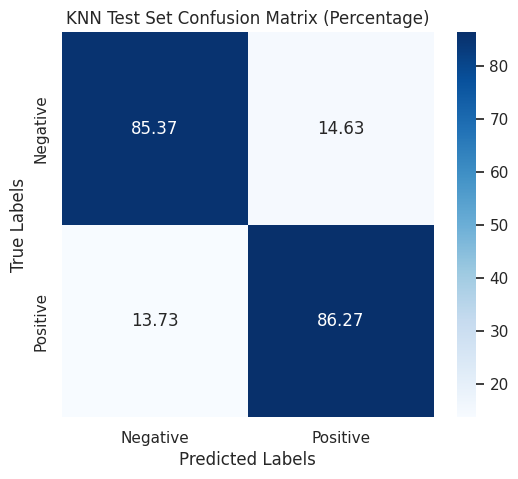

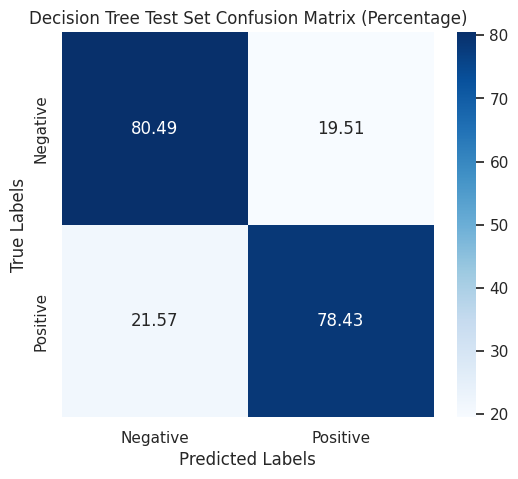

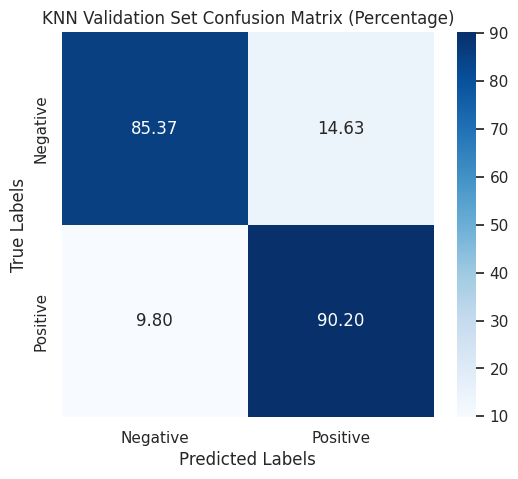

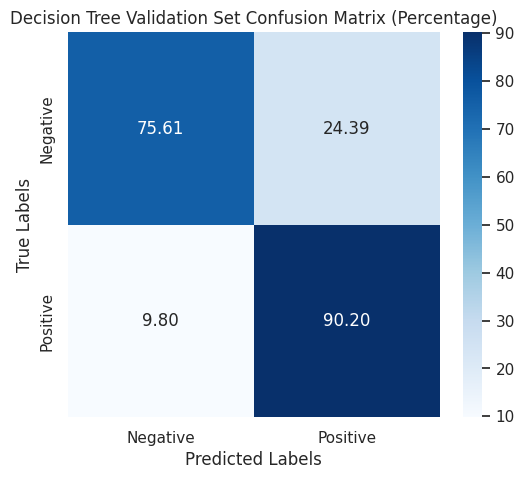

In [12]:
# 5. Train and Evaluate Naïve Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Predict on test and validation data
y_pred_nb = nb_classifier.predict(X_test_scaled)
y_pred_nb_val = nb_classifier.predict(X_val_scaled)

# Calculate metrics for Naïve Bayes
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

# Calculate validation metrics for Naïve Bayes
nb_metrics_val = [
    accuracy_score(y_val, y_pred_nb_val),
    precision_score(y_val, y_pred_nb_val),
    recall_score(y_val, y_pred_nb_val),
    f1_score(y_val, y_pred_nb_val)
]

# 6. Train and Evaluate SVM
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train_scaled, y_train)

# Predict on test and validation data
y_pred_svm = svm_classifier.predict(X_test_scaled)
y_pred_svm_val = svm_classifier.predict(X_val_scaled)

# Calculate metrics for SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate validation metrics for SVM
svm_metrics_val = [
    accuracy_score(y_val, y_pred_svm_val),
    precision_score(y_val, y_pred_svm_val),
    recall_score(y_val, y_pred_svm_val),
    f1_score(y_val, y_pred_svm_val)
]

# 7. Train and Evaluate KNN
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train_scaled, y_train)

# Predict on test and validation data
y_pred_knn = knn_classifier.predict(X_test_scaled)
y_pred_knn_val = knn_classifier.predict(X_val_scaled)

# Calculate metrics for KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

# Calculate validation metrics for KNN
knn_metrics_val = [
    accuracy_score(y_val, y_pred_knn_val),
    precision_score(y_val, y_pred_knn_val),
    recall_score(y_val, y_pred_knn_val),
    f1_score(y_val, y_pred_knn_val)
]

# 8. Train and Evaluate Decision Trees
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Predict on test and validation data
y_pred_dt = dt_classifier.predict(X_test_scaled)
y_pred_dt_val = dt_classifier.predict(X_val_scaled)

# Calculate metrics for Decision Trees
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

# Calculate validation metrics for Decision Trees
dt_metrics_val = [
    accuracy_score(y_val, y_pred_dt_val),
    precision_score(y_val, y_pred_dt_val),
    recall_score(y_val, y_pred_dt_val),
    f1_score(y_val, y_pred_dt_val)
]

# Prepare Data for Combined Plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
models = ['Naïve Bayes', 'SVM', 'KNN', 'Decision Tree']

# Collect results for each classifier for the test set
test_scores = {
    'Naïve Bayes': [nb_accuracy, nb_precision, nb_recall, nb_f1],
    'SVM': [svm_accuracy, svm_precision, svm_recall, svm_f1],
    'KNN': [knn_accuracy, knn_precision, knn_recall, knn_f1],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1]
}

# Collect results for each classifier for the validation set
val_scores = {
    'Naïve Bayes': nb_metrics_val,
    'SVM': svm_metrics_val,
    'KNN': knn_metrics_val,
    'Decision Tree': dt_metrics_val
}

# Set bar width and position for the bars
bar_width = 0.20
x = np.arange(len(metrics))  # The label locations

# Plotting the test set graph
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through the models and plot bars for each
for i, model in enumerate(models):
    ax.bar(x + i * bar_width - 1.5 * bar_width, test_scores[model], bar_width, label=f'{model} - Test Set')

# Add labels and title for the test set
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Models on Test Set', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add labels above the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add value labels on top of each bar for the test graph
for rects in ax.patches:
    add_labels([rects])

# Show the test plot
plt.tight_layout()
plt.show()

# Plotting the validation set graph
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through the models and plot bars for each
for i, model in enumerate(models):
    ax.bar(x + i * bar_width - 1.5 * bar_width, val_scores[model], bar_width, label=f'{model} - Validation Set')

# Add labels and title for the validation set
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Models on Validation Set', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on top of each bar for the validation graph
for rects in ax.patches:
    add_labels([rects])

# Show the validation plot
plt.tight_layout()
plt.show()


def confusion_matrix_percentage(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Convert to percentage
    return cm_percentage

# Calculate confusion matrices for test set and validation set for each model
cm_knn_test = confusion_matrix_percentage(y_test, y_pred_knn)
cm_knn_val = confusion_matrix_percentage(y_val, y_pred_knn_val)

cm_dt_test = confusion_matrix_percentage(y_test, y_pred_dt)
cm_dt_val = confusion_matrix_percentage(y_val, y_pred_dt_val)

# Print confusion matrices as percentage
print("KNN Test Set Confusion Matrix (Percentage):")
print(cm_knn_test)

print("KNN Validation Set Confusion Matrix (Percentage):")
print(cm_knn_val)

print("Decision Tree Test Set Confusion Matrix (Percentage):")
print(cm_dt_test)

print("Decision Tree Validation Set Confusion Matrix (Percentage):")
print(cm_dt_val)


# Function to calculate and display the confusion matrix in percentage
def confusion_matrix_percentage(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Convert to percentage
    return cm_percentage

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix', labels=None):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Calculate confusion matrices for test set
cm_knn_test = confusion_matrix_percentage(y_test, y_pred_knn)
cm_dt_test = confusion_matrix_percentage(y_test, y_pred_dt)

# Calculate confusion matrices for validation set
cm_knn_val = confusion_matrix_percentage(y_val, y_pred_knn_val)
cm_dt_val = confusion_matrix_percentage(y_val, y_pred_dt_val)

# Define class labels (assuming binary classification, adjust if necessary)
labels = ['Negative', 'Positive']

# Plot confusion matrices for test set
plot_confusion_matrix(cm_knn_test, title='KNN Test Set Confusion Matrix (Percentage)', labels=labels)
plot_confusion_matrix(cm_dt_test, title='Decision Tree Test Set Confusion Matrix (Percentage)', labels=labels)

# Plot confusion matrices for validation set
plot_confusion_matrix(cm_knn_val, title='KNN Validation Set Confusion Matrix (Percentage)', labels=labels)
plot_confusion_matrix(cm_dt_val, title='Decision Tree Validation Set Confusion Matrix (Percentage)', labels=labels)


Running GridSearchCV for Naïve Bayes
Running GridSearchCV for SVM
Running GridSearchCV for KNN
Running GridSearchCV for Decision Tree
Running GridSearchCV for Naïve Bayes
Best Parameters for Naïve Bayes: {'var_smoothing': 0.2848035868435802}
Best Cross-Validated Accuracy for Naïve Bayes: 0.8429
Running GridSearchCV for SVM
Best Parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Best Cross-Validated Accuracy for SVM: 0.8592
Running GridSearchCV for KNN
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7}
Best Cross-Validated Accuracy for KNN: 0.8702
Running GridSearchCV for Decision Tree
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validated Accuracy for Decision Tree: 0.8292


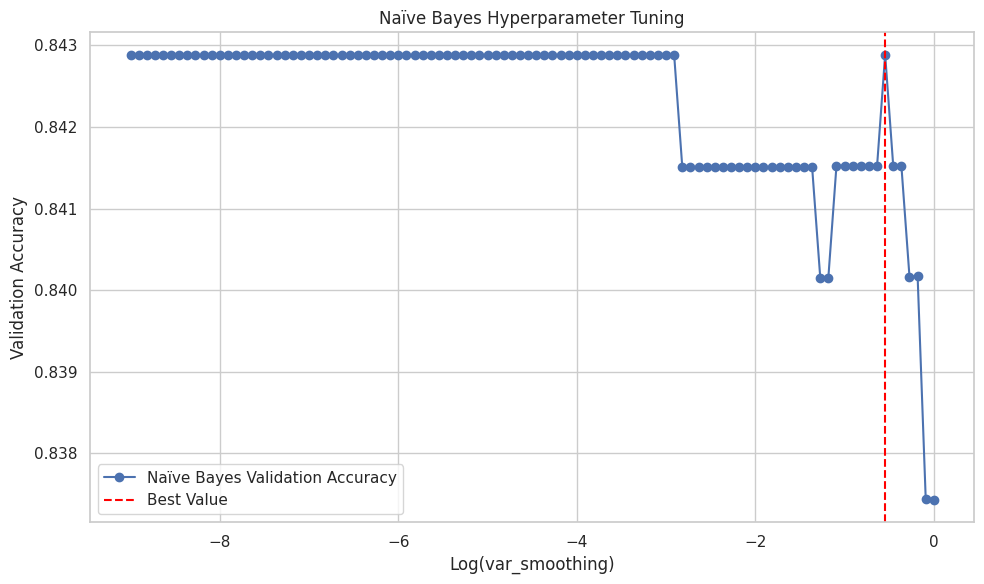

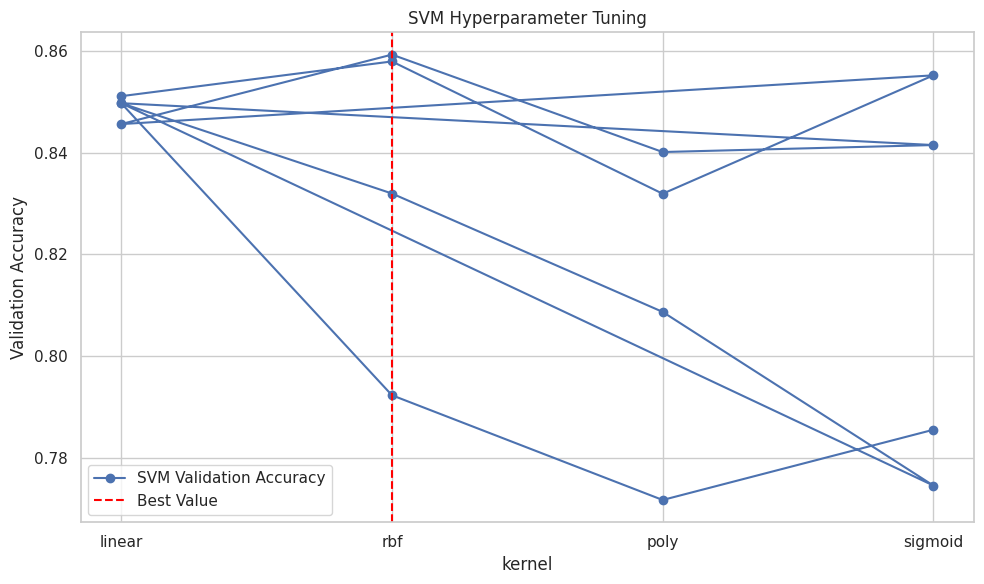

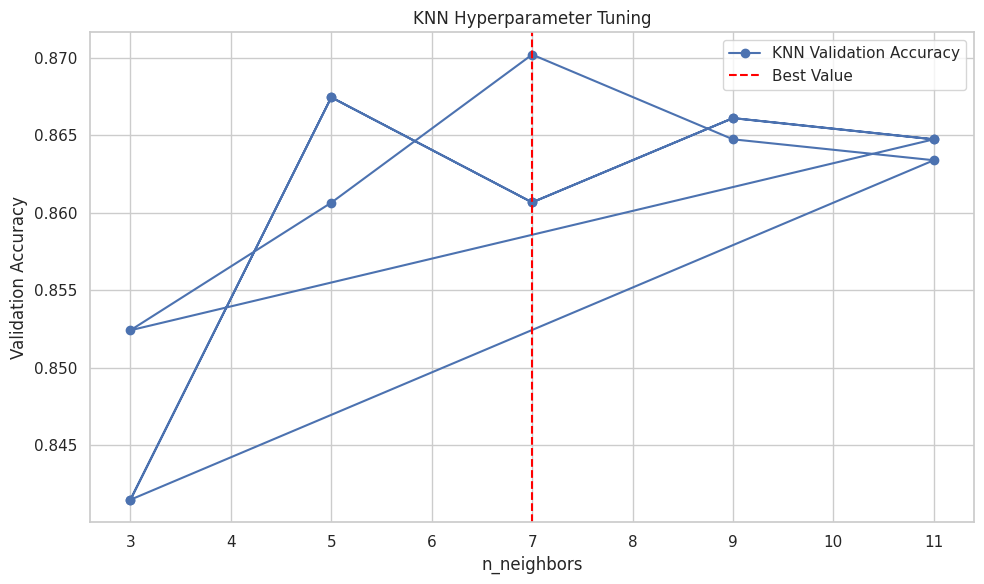

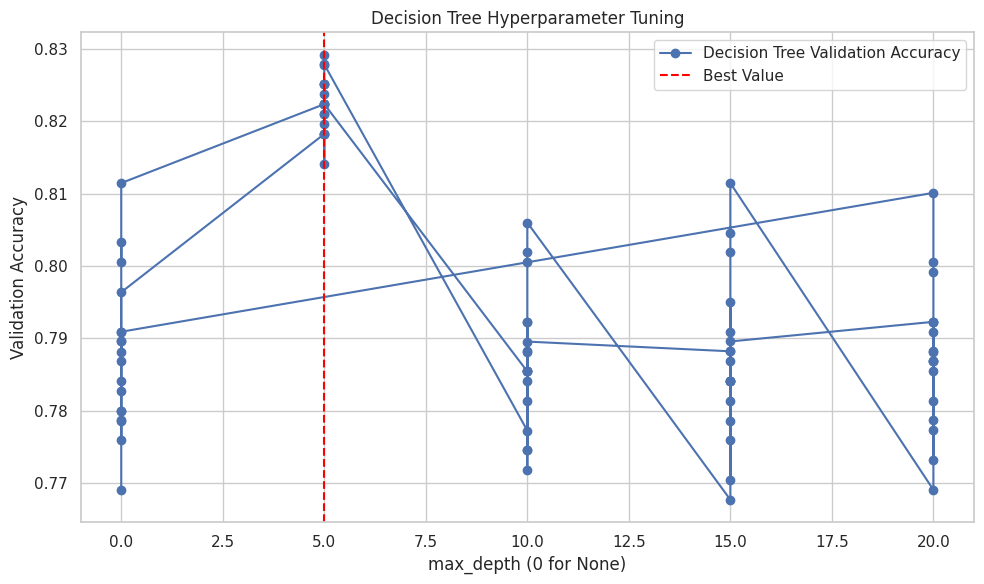

In [13]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

# Define Hyperparameter Grids for each classifier

# 1. Naïve Bayes Hyperparameters
nb_param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Log scale for smoothing
}

# 2. SVM Hyperparameters
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# 3. KNN Hyperparameters
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# 4. Decision Tree Hyperparameters
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Define classifiers
classifiers = {
    "Naïve Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

param_grids = {
    "Naïve Bayes": nb_param_grid,
    "SVM": svm_param_grid,
    "KNN": knn_param_grid,
    "Decision Tree": dt_param_grid
}

# Initialize grid search
grid_search_results = {}

for clf_name, clf in classifiers.items():
    print(f"Running GridSearchCV for {clf_name}")

    # Select the parameter grid for the current classifier
    param_grid = param_grids[clf_name]

    # Create GridSearchCV object (you can use RandomizedSearchCV as well for faster search)
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Store the results
    grid_search_results[clf_name] = grid_search

# Iterate through classifiers and perform GridSearchCV
for clf_name, clf in classifiers.items():
    print(f"Running GridSearchCV for {clf_name}")

    # Select the parameter grid for the current classifier
    param_grid = param_grids[clf_name]

    # Create GridSearchCV object
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Store the results
    grid_search_results[clf_name] = grid_search

    # Print the best parameters and accuracy
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best Parameters for {clf_name}: {best_params}")
    print(f"Best Cross-Validated Accuracy for {clf_name}: {best_score:.4f}")

# Plotting the training and validation accuracy vs hyperparameters
for clf_name, grid_search in grid_search_results.items():
    # Get the results
    mean_test_scores = grid_search.cv_results_['mean_test_score']
    param_values = grid_search.cv_results_['params']

    # Extract hyperparameters for plotting based on classifier
    if clf_name == "Naïve Bayes":
        param_values = np.log10([param['var_smoothing'] for param in param_values])
        param_label = 'Log(var_smoothing)'  # Label for Naïve Bayes
    elif clf_name == "SVM":
        param_values = [param['kernel'] for param in param_values]  # Plot for `C`
        param_label = 'kernel'  # Label for SVM
    elif clf_name == "KNN":
        param_values = [param['n_neighbors'] for param in param_values]
        param_label = 'n_neighbors'  # Label for KNN
    elif clf_name == "Decision Tree":
        param_values = [param['max_depth'] if param['max_depth'] is not None else 0 for param in param_values]
        param_label = 'max_depth (0 for None)'  # Label for Decision Trees

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(param_values, mean_test_scores, marker='o', label=f'{clf_name} Validation Accuracy')
    plt.axvline(
        x=param_values[np.argmax(mean_test_scores)],
        color='red',
        linestyle='--',
        label='Best Value'
    )
    plt.xlabel(param_label)  # Label the x-axis with the hyperparameter name
    plt.ylabel('Validation Accuracy')
    plt.title(f'{clf_name} Hyperparameter Tuning')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


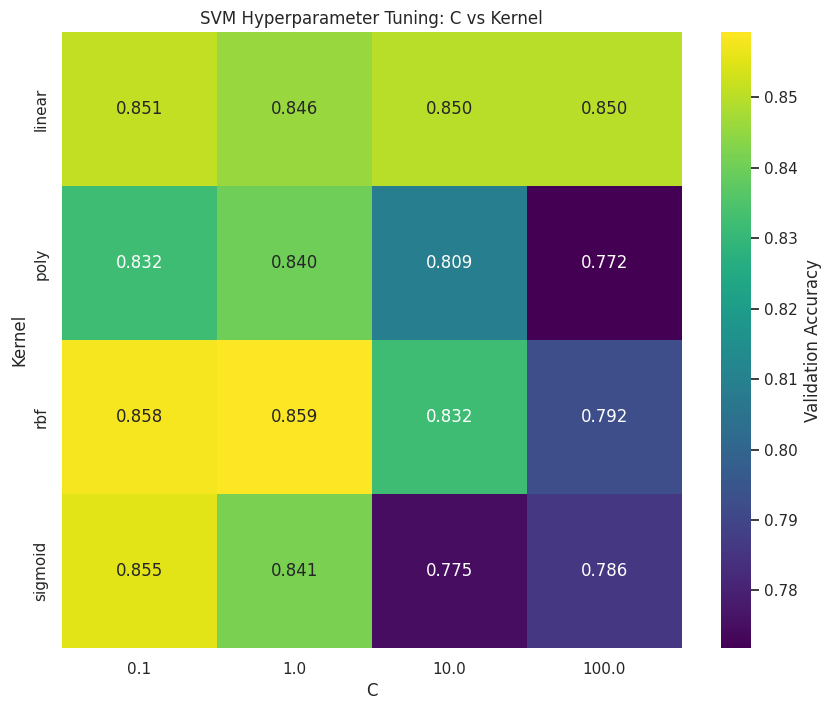

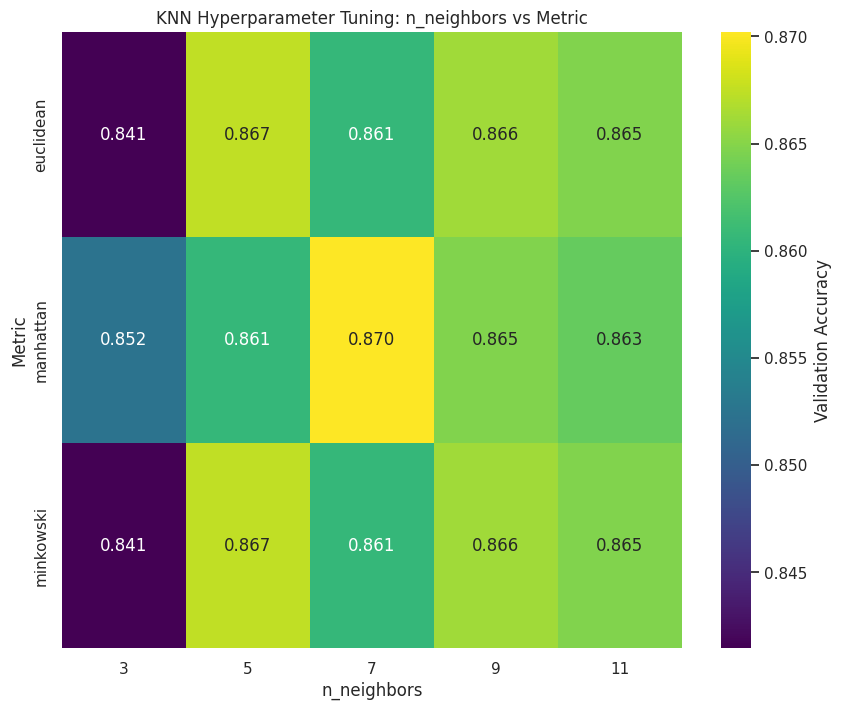

In [14]:
import seaborn as sns
import pandas as pd

# Extract results from GridSearchCV for SVM
svm_results = grid_search_results["SVM"].cv_results_
df_svm = pd.DataFrame(svm_results)

# Filter relevant columns for heatmap
df_filtered = df_svm[['mean_test_score', 'param_C', 'param_kernel']]

# Pivot table to reshape data for heatmap
heatmap_data = df_filtered.pivot(index='param_kernel', columns='param_C', values='mean_test_score')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Validation Accuracy'})
plt.title("SVM Hyperparameter Tuning: C vs Kernel")
plt.xlabel("C")
plt.ylabel("Kernel")
plt.show()
#--------------------------------------------------------------------------------------------
# Extract results from GridSearchCV for KNN
knn_results = grid_search_results["KNN"].cv_results_
df_knn = pd.DataFrame(knn_results)

# Filter relevant columns for heatmap
df_filtered = df_knn[['mean_test_score', 'param_n_neighbors', 'param_metric']]

# Pivot table to reshape data for heatmap
heatmap_data = df_filtered.pivot(index='param_metric', columns='param_n_neighbors', values='mean_test_score')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Validation Accuracy'})
plt.title("KNN Hyperparameter Tuning: n_neighbors vs Metric")
plt.xlabel("n_neighbors")
plt.ylabel("Metric")
plt.show()
#---------------------------------------------------------------------------------------






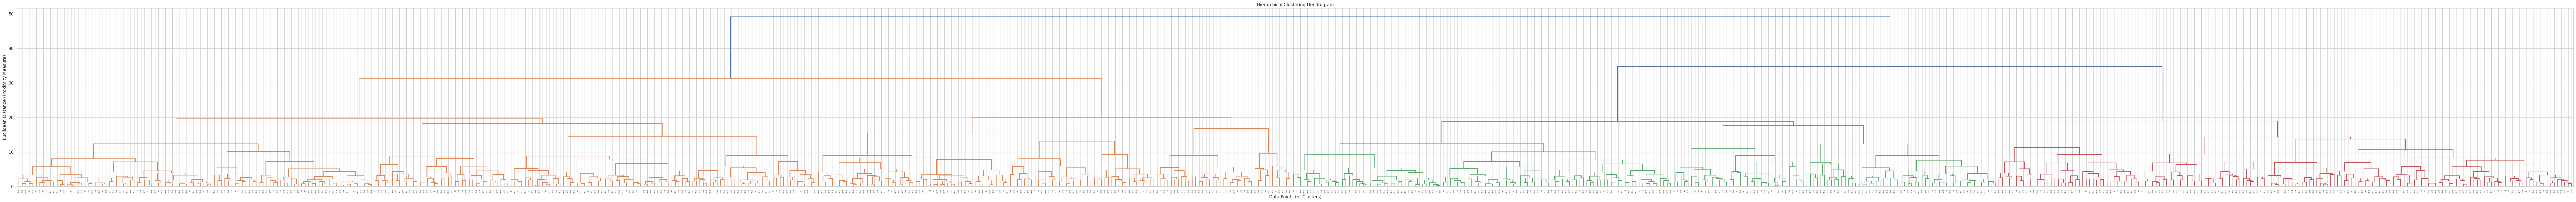

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,  fcluster

# Linkage method determines how distances between clusters are calculated
# Use Ward's method (minimizes variance within clusters)
linkage_matrix0 = linkage(X_train_scaled, method='ward', metric='euclidean')

# Create the dendrogram
plt.figure(figsize=(100, 8))
dendrogram(linkage_matrix0)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points (or Clusters)')
plt.ylabel('Euclidean Distance (Proximity Measure)')
plt.grid(True)
plt.tight_layout()
plt.show()



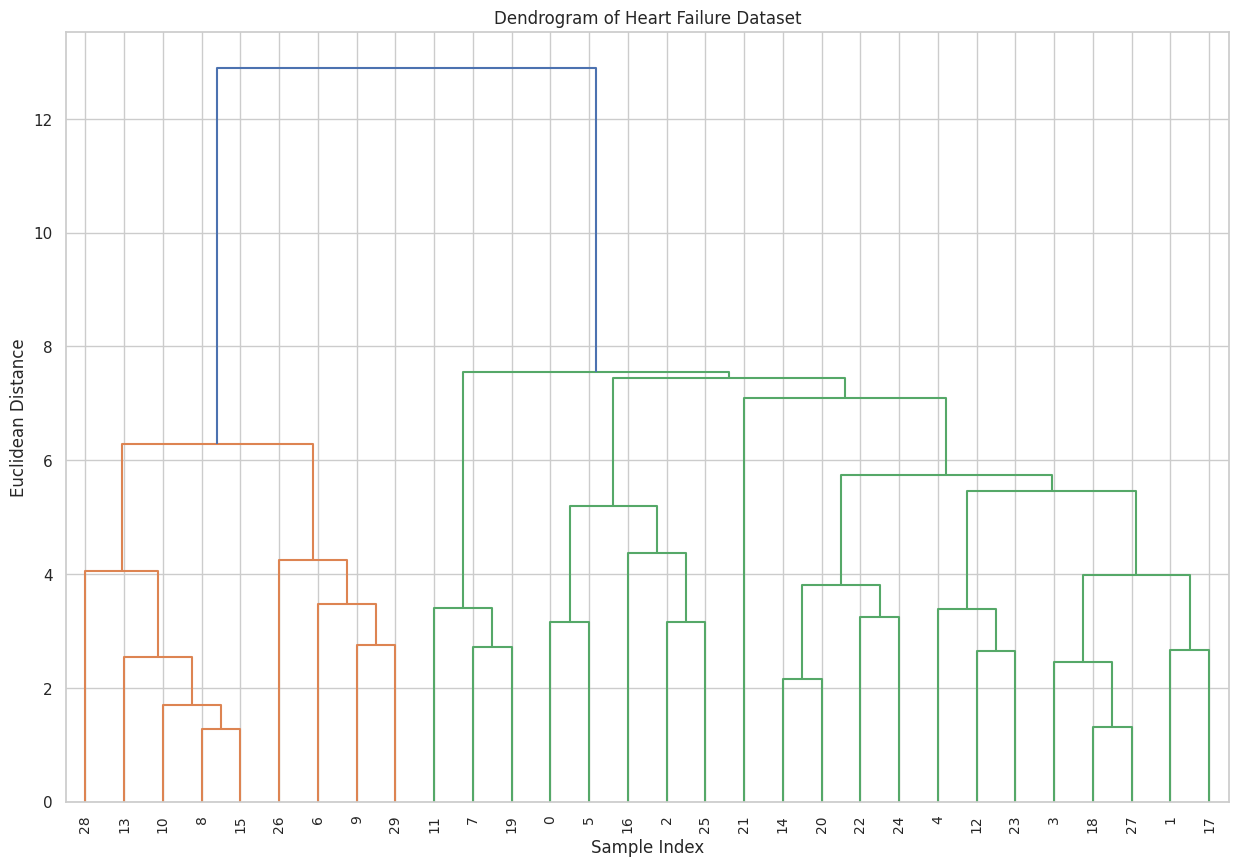

In [ ]:
num_samples = 30  # Define the number of samples you want
random_indices = np.random.choice(X_train_scaled.shape[0], size=num_samples, replace=False)
X_sampled = X_train_scaled[random_indices]

# Perform hierarchical clustering
linked = linkage(X_sampled, method='ward', metric='euclidean')
plt.figure(figsize=(15, 10))
dendrogram(linked, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram of Heart Failure Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

Number of clusters: 2

Cluster Assignments:
Cluster 1: [6, 8, 9, 10, 13, 15, 26, 28, 29]
Cluster 2: [0, 1, 2, 3, 4, 5, 7, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27]


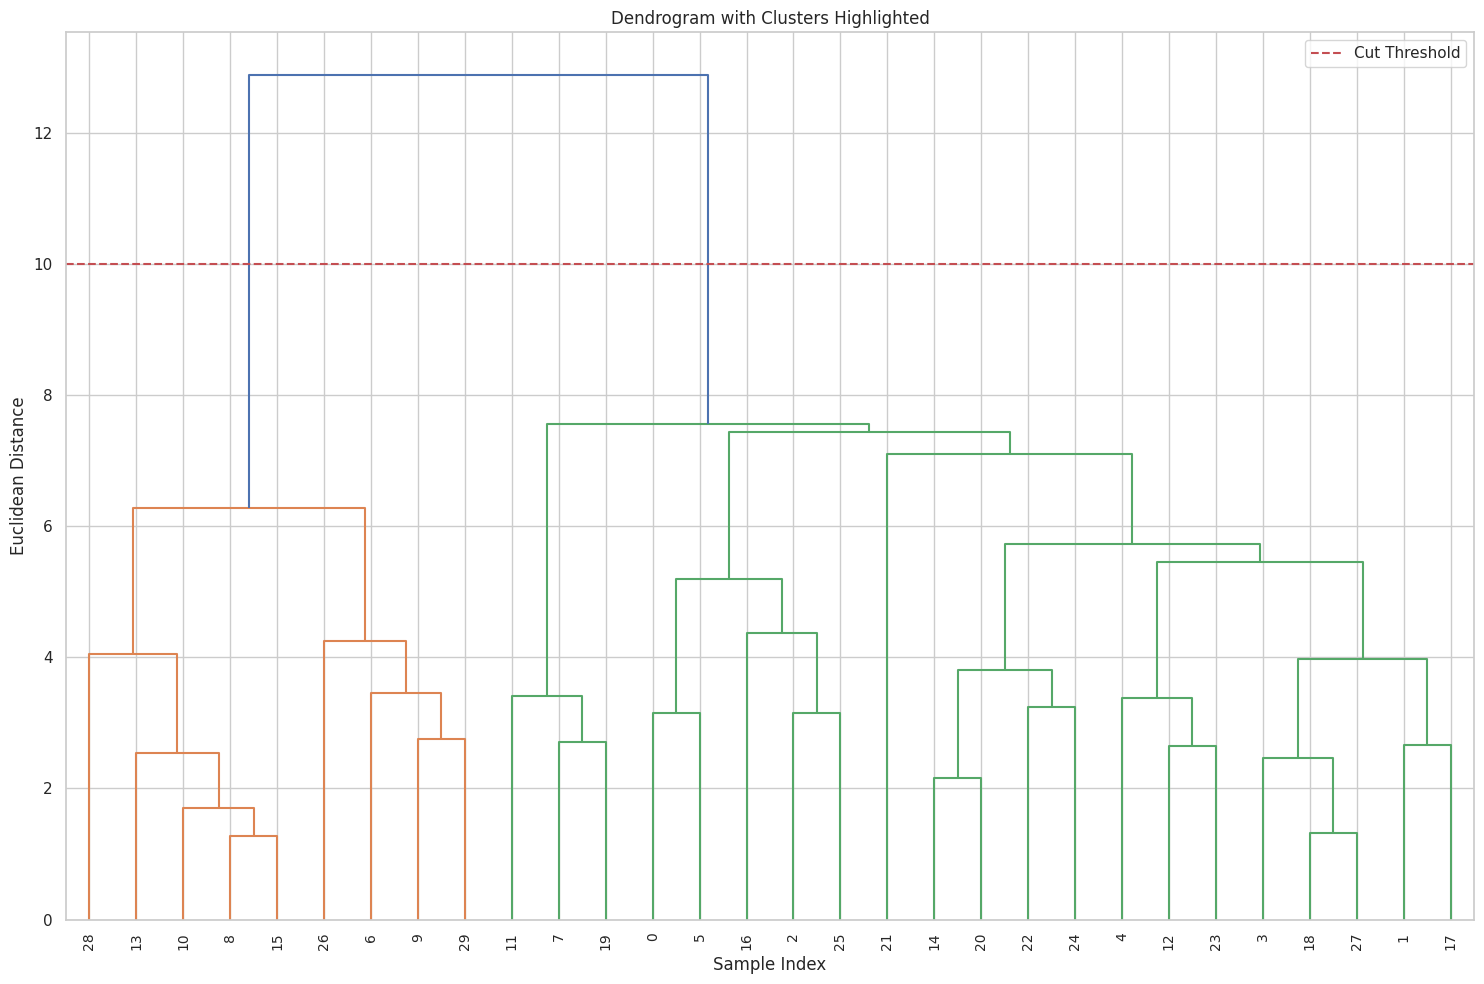

In [ ]:
# Step 4: Cut the Dendrogram to Form Clusters
max_d = 10 # Threshold distance for cutting the dendrogram
clusters = fcluster(linked, max_d, criterion='distance')

# Step 5: Print Number of Clusters
num_clusters = len(set(clusters))
print(f"Number of clusters: {num_clusters}")

# Step 6: Analyze Cluster Assignments
clusters_dict = {i: [] for i in range(1, num_clusters + 1)}
for sample_idx, cluster_label in enumerate(clusters):
    clusters_dict[cluster_label].append(sample_idx)

print("\nCluster Assignments:")
for cluster, points in clusters_dict.items():
    print(f"Cluster {cluster}: {points}")

# Step 7: Visualize Clusters on Dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked, leaf_rotation=90., leaf_font_size=10.,
           color_threshold=max_d)
plt.axhline(y=max_d, color='r', linestyle='--', label='Cut Threshold')
plt.title('Dendrogram with Clusters Highlighted')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.legend()
plt.tight_layout()
plt.show()


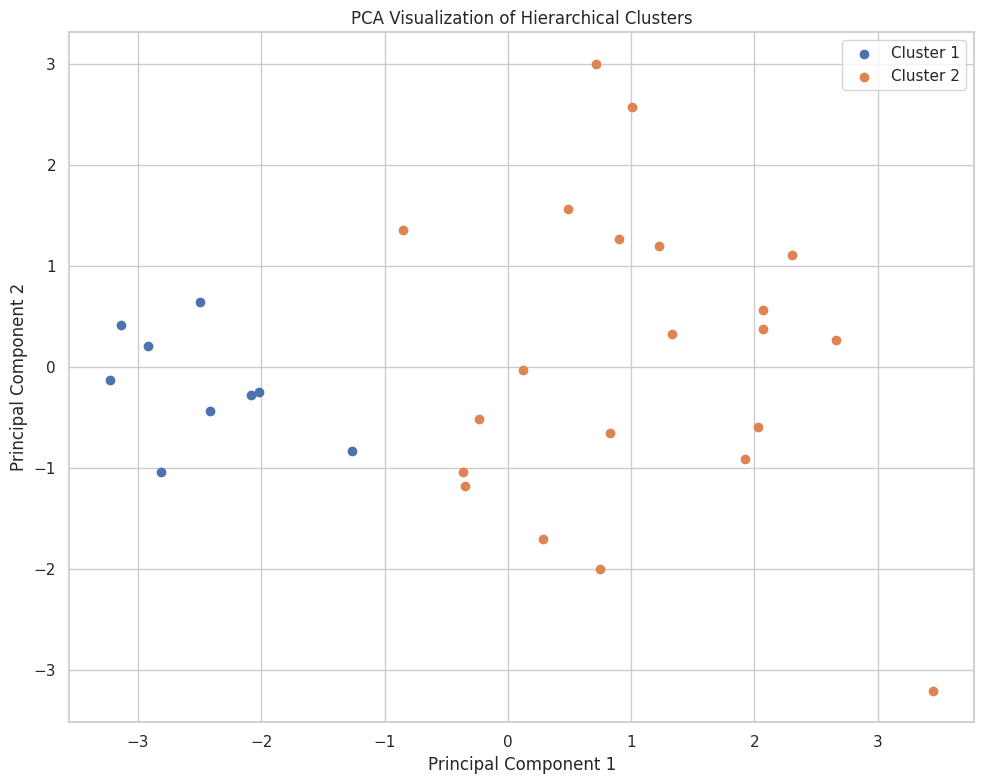

In [ ]:
from sklearn.decomposition import PCA

# PCA transformation (assuming PCA has already been done)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sampled)

# Plot the PCA results with clusters
plt.figure(figsize=(10, 8))
for cluster in set(clusters):
    cluster_points = X_pca[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('PCA Visualization of Hierarchical Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Running GridSearchCV for Naïve Bayes
Running GridSearchCV for SVM
Running GridSearchCV for KNN
Running GridSearchCV for Decision Tree


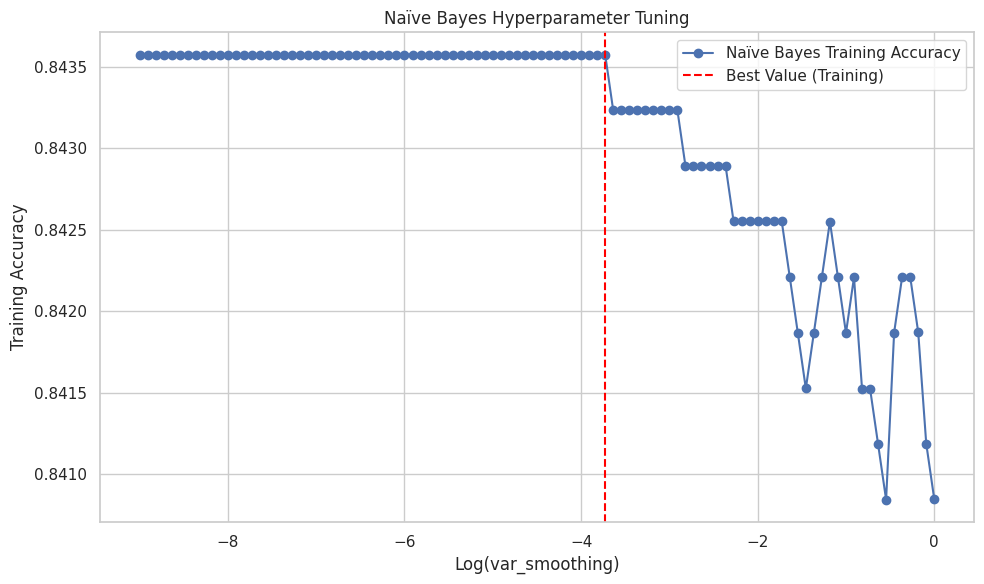

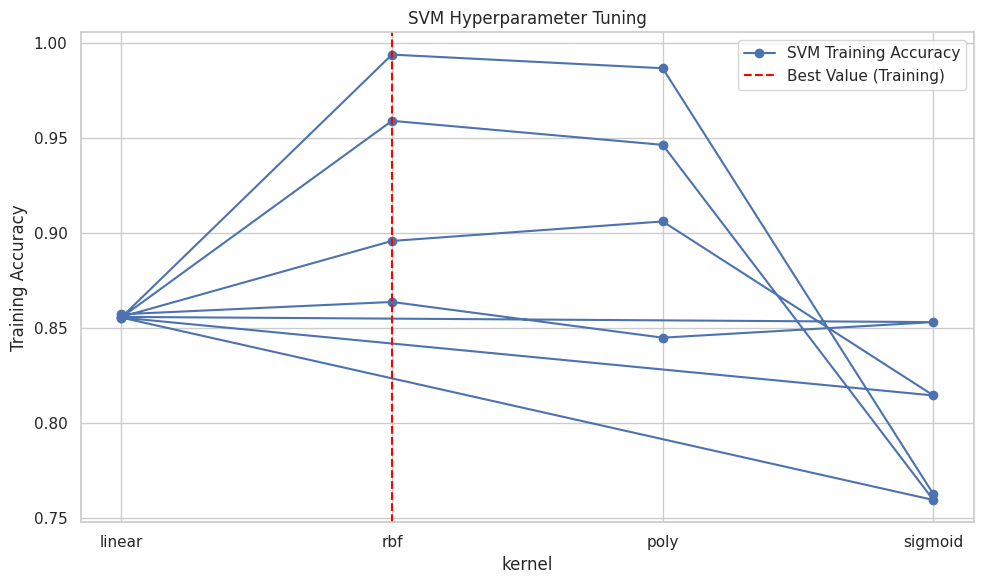

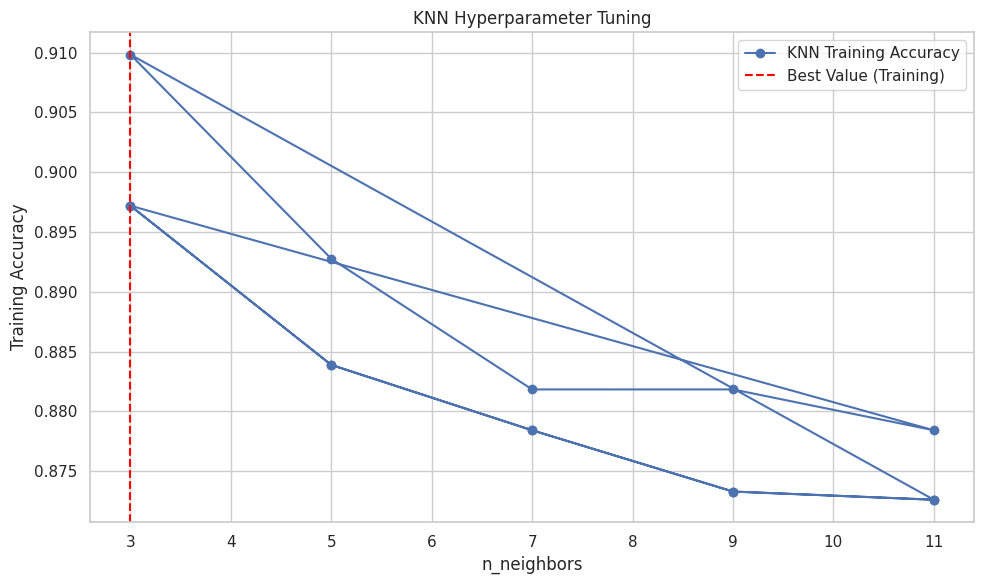

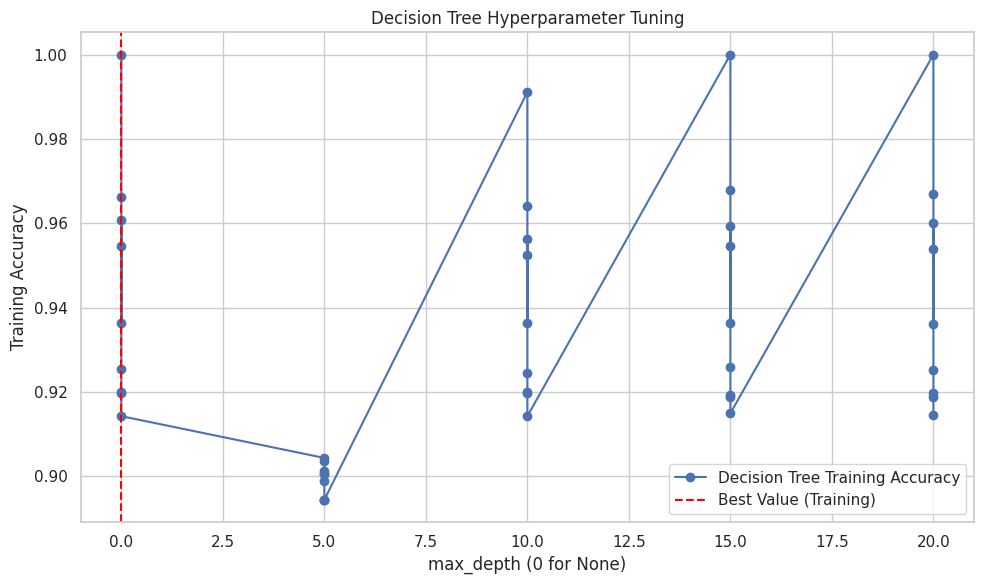

In [15]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

# Define Hyperparameter Grids for each classifier

# 1. Naïve Bayes Hyperparameters
nb_param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Log scale for smoothing
}

# 2. SVM Hyperparameters
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# 3. KNN Hyperparameters
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# 4. Decision Tree Hyperparameters
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define classifiers
classifiers = {
    "Naïve Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

param_grids = {
    "Naïve Bayes": nb_param_grid,
    "SVM": svm_param_grid,
    "KNN": knn_param_grid,
    "Decision Tree": dt_param_grid
}

# Initialize grid search
grid_search_results = {}

for clf_name, clf in classifiers.items():
    print(f"Running GridSearchCV for {clf_name}")

    # Select the parameter grid for the current classifier
    param_grid = param_grids[clf_name]

    # Create GridSearchCV object (you can use RandomizedSearchCV as well for faster search)
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
    grid_search.fit(X_train_scaled, y_train)

    # Store the results
    grid_search_results[clf_name] = grid_search

# Plotting the training accuracy vs hyperparameters
for clf_name, grid_search in grid_search_results.items():
    # Get the results
    mean_train_scores = grid_search.cv_results_['mean_train_score']
    param_values = grid_search.cv_results_['params']

    # Extract hyperparameters for plotting based on classifier
    if clf_name == "Naïve Bayes":
        param_values = np.log10([param['var_smoothing'] for param in param_values])
        param_label = 'Log(var_smoothing)'  # Label for Naïve Bayes
    elif clf_name == "SVM":
        param_values = [param['kernel'] for param in param_values]  # Plot for `C`
        param_label = 'kernel'  # Label for SVM
    elif clf_name == "KNN":
        param_values = [param['n_neighbors'] for param in param_values]
        param_label = 'n_neighbors'  # Label for KNN
    elif clf_name == "Decision Tree":
        param_values = [param['max_depth'] if param['max_depth'] is not None else 0 for param in param_values]
        param_label = 'max_depth (0 for None)'  # Label for Decision Trees

    # Plot the results for training accuracy only
    plt.figure(figsize=(10, 6))
    plt.plot(param_values, mean_train_scores, marker='o', label=f'{clf_name} Training Accuracy')

    plt.axvline(
        x=param_values[np.argmax(mean_train_scores)],
        color='red',
        linestyle='--',
        label='Best Value (Training)'
    )

    plt.xlabel(param_label)  # Label the x-axis with the hyperparameter name
    plt.ylabel('Training Accuracy')
    plt.title(f'{clf_name} Hyperparameter Tuning')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Running GridSearchCV for Naïve Bayes
Running GridSearchCV for SVM
Running GridSearchCV for KNN
Running GridSearchCV for Decision Tree


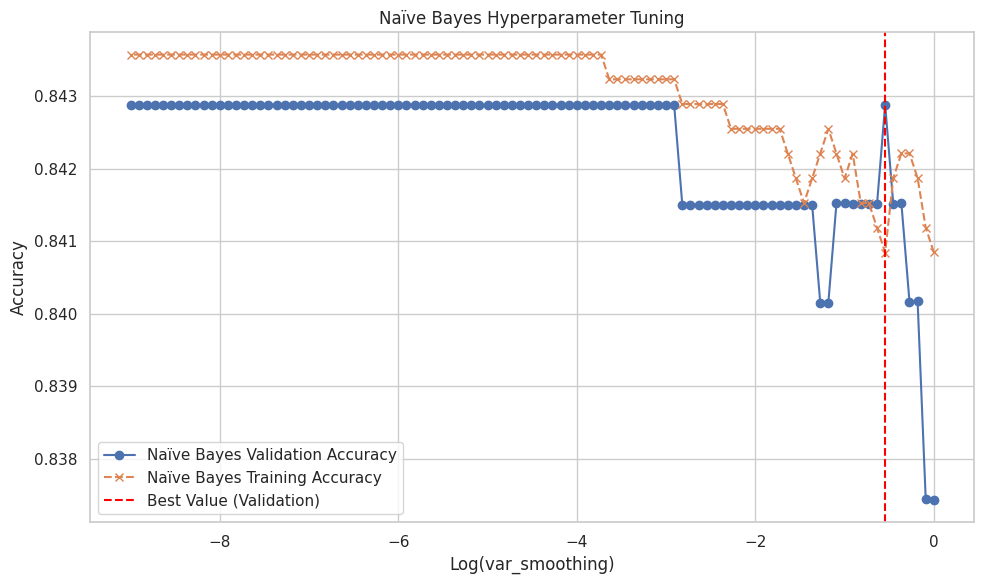

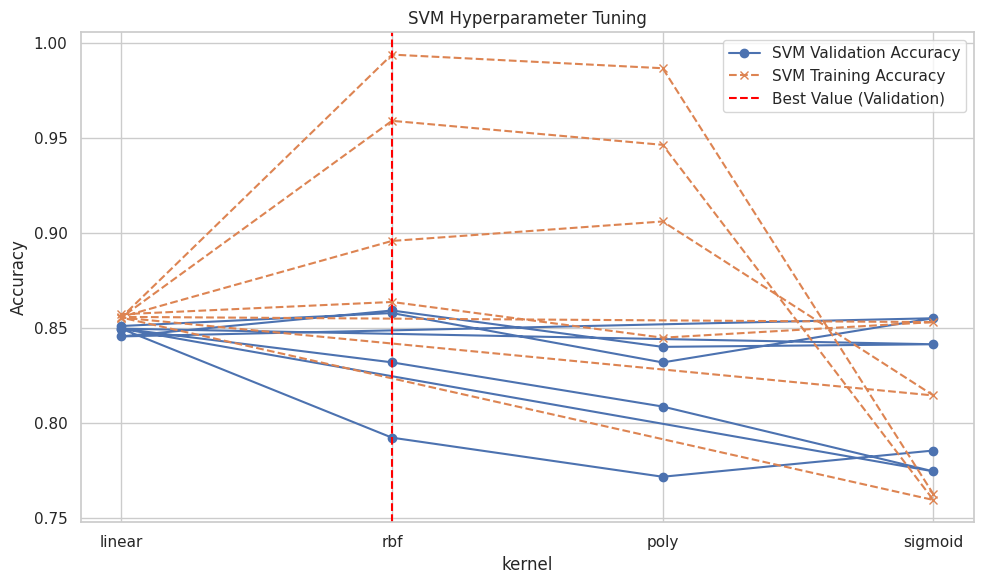

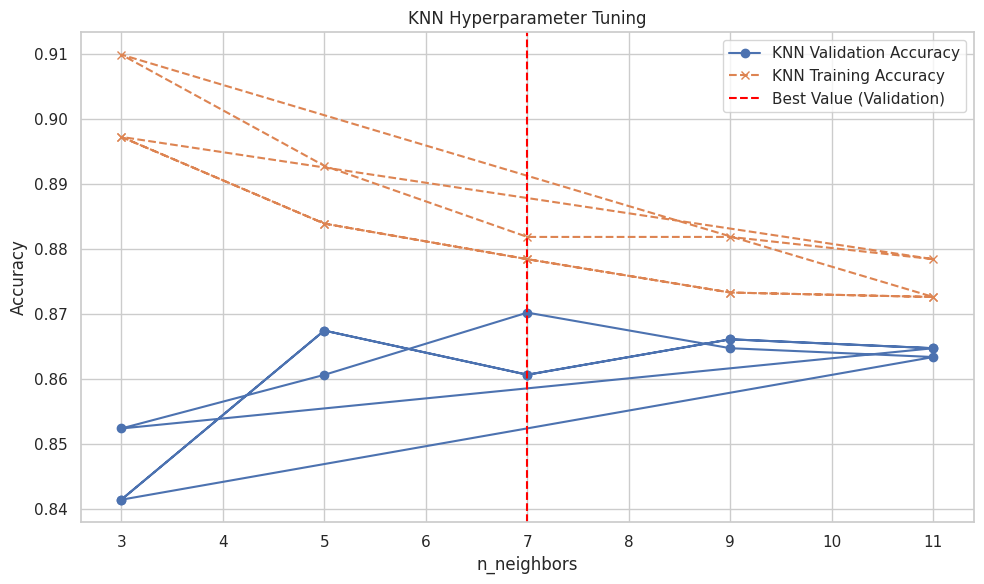

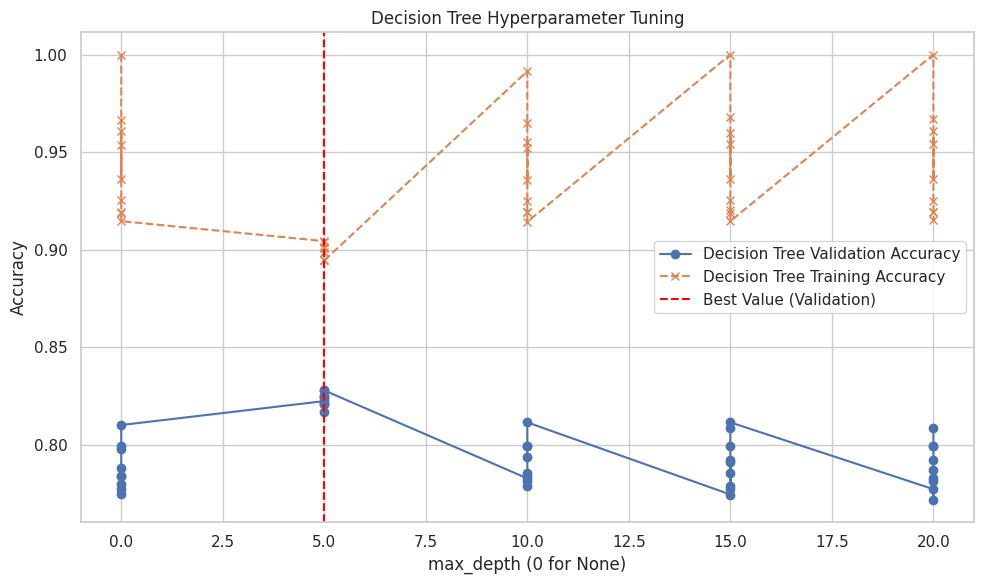

In [16]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

# Define Hyperparameter Grids for each classifier

# 1. Naïve Bayes Hyperparameters
nb_param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Log scale for smoothing
}

# 2. SVM Hyperparameters
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# 3. KNN Hyperparameters
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# 4. Decision Tree Hyperparameters
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define classifiers
classifiers = {
    "Naïve Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

param_grids = {
    "Naïve Bayes": nb_param_grid,
    "SVM": svm_param_grid,
    "KNN": knn_param_grid,
    "Decision Tree": dt_param_grid
}

# Initialize grid search
grid_search_results = {}

for clf_name, clf in classifiers.items():
    print(f"Running GridSearchCV for {clf_name}")

    # Select the parameter grid for the current classifier
    param_grid = param_grids[clf_name]

    # Create GridSearchCV object (you can use RandomizedSearchCV as well for faster search)
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
    grid_search.fit(X_train_scaled, y_train)

    # Store the results
    grid_search_results[clf_name] = grid_search

# Plotting the training and validation accuracy vs hyperparameters
for clf_name, grid_search in grid_search_results.items():
    # Get the results
    mean_test_scores = grid_search.cv_results_['mean_test_score']
    mean_train_scores = grid_search.cv_results_['mean_train_score']
    param_values = grid_search.cv_results_['params']

    # Extract hyperparameters for plotting based on classifier
    if clf_name == "Naïve Bayes":
        param_values = np.log10([param['var_smoothing'] for param in param_values])
        param_label = 'Log(var_smoothing)'  # Label for Naïve Bayes
    elif clf_name == "SVM":
        param_values = [param['kernel'] for param in param_values]  # Plot for `C`
        param_label = 'kernel'  # Label for SVM
    elif clf_name == "KNN":
        param_values = [param['n_neighbors'] for param in param_values]
        param_label = 'n_neighbors'  # Label for KNN
    elif clf_name == "Decision Tree":
        param_values = [param['max_depth'] if param['max_depth'] is not None else 0 for param in param_values]
        param_label = 'max_depth (0 for None)'  # Label for Decision Trees

    # Plot the results for both training and validation accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(param_values, mean_test_scores, marker='o', label=f'{clf_name} Validation Accuracy')
    plt.plot(param_values, mean_train_scores, marker='x', linestyle='--', label=f'{clf_name} Training Accuracy')

    plt.axvline(
        x=param_values[np.argmax(mean_test_scores)],
        color='red',
        linestyle='--',
        label='Best Value (Validation)'
    )

    plt.xlabel(param_label)  # Label the x-axis with the hyperparameter name
    plt.ylabel('Accuracy')
    plt.title(f'{clf_name} Hyperparameter Tuning')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
